In [1]:
!pip install pulp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 101.4 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Image

import matplotlib.pyplot as plt

import pulp

In [3]:
data = pd.read_csv("/content/supply_chain_data.csv")

In [4]:
print(data.head())

  Product type   SKU      Price  Availability  Number of products sold  \
0     haircare  SKU0  69.808006            55                      802   
1     skincare  SKU1  14.843523            95                      736   
2     haircare  SKU2  11.319683            34                        8   
3     skincare  SKU3  61.163343            68                       83   
4     skincare  SKU4   4.805496            26                      871   

   Revenue generated Customer demographics  Stock levels  Lead times  \
0        8661.996792            Non-binary            58           7   
1        7460.900065                Female            53          30   
2        9577.749626               Unknown             1          10   
3        7766.836426            Non-binary            23          13   
4        2686.505152            Non-binary             5           3   

   Order quantities  ...  Location Lead time  Production volumes  \
0                96  ...    Mumbai        29          

In [5]:
data.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [6]:
data.shape

(100, 24)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [8]:
data.isnull().sum().any()

np.False_

EDA (Exploratory Data Analysis)

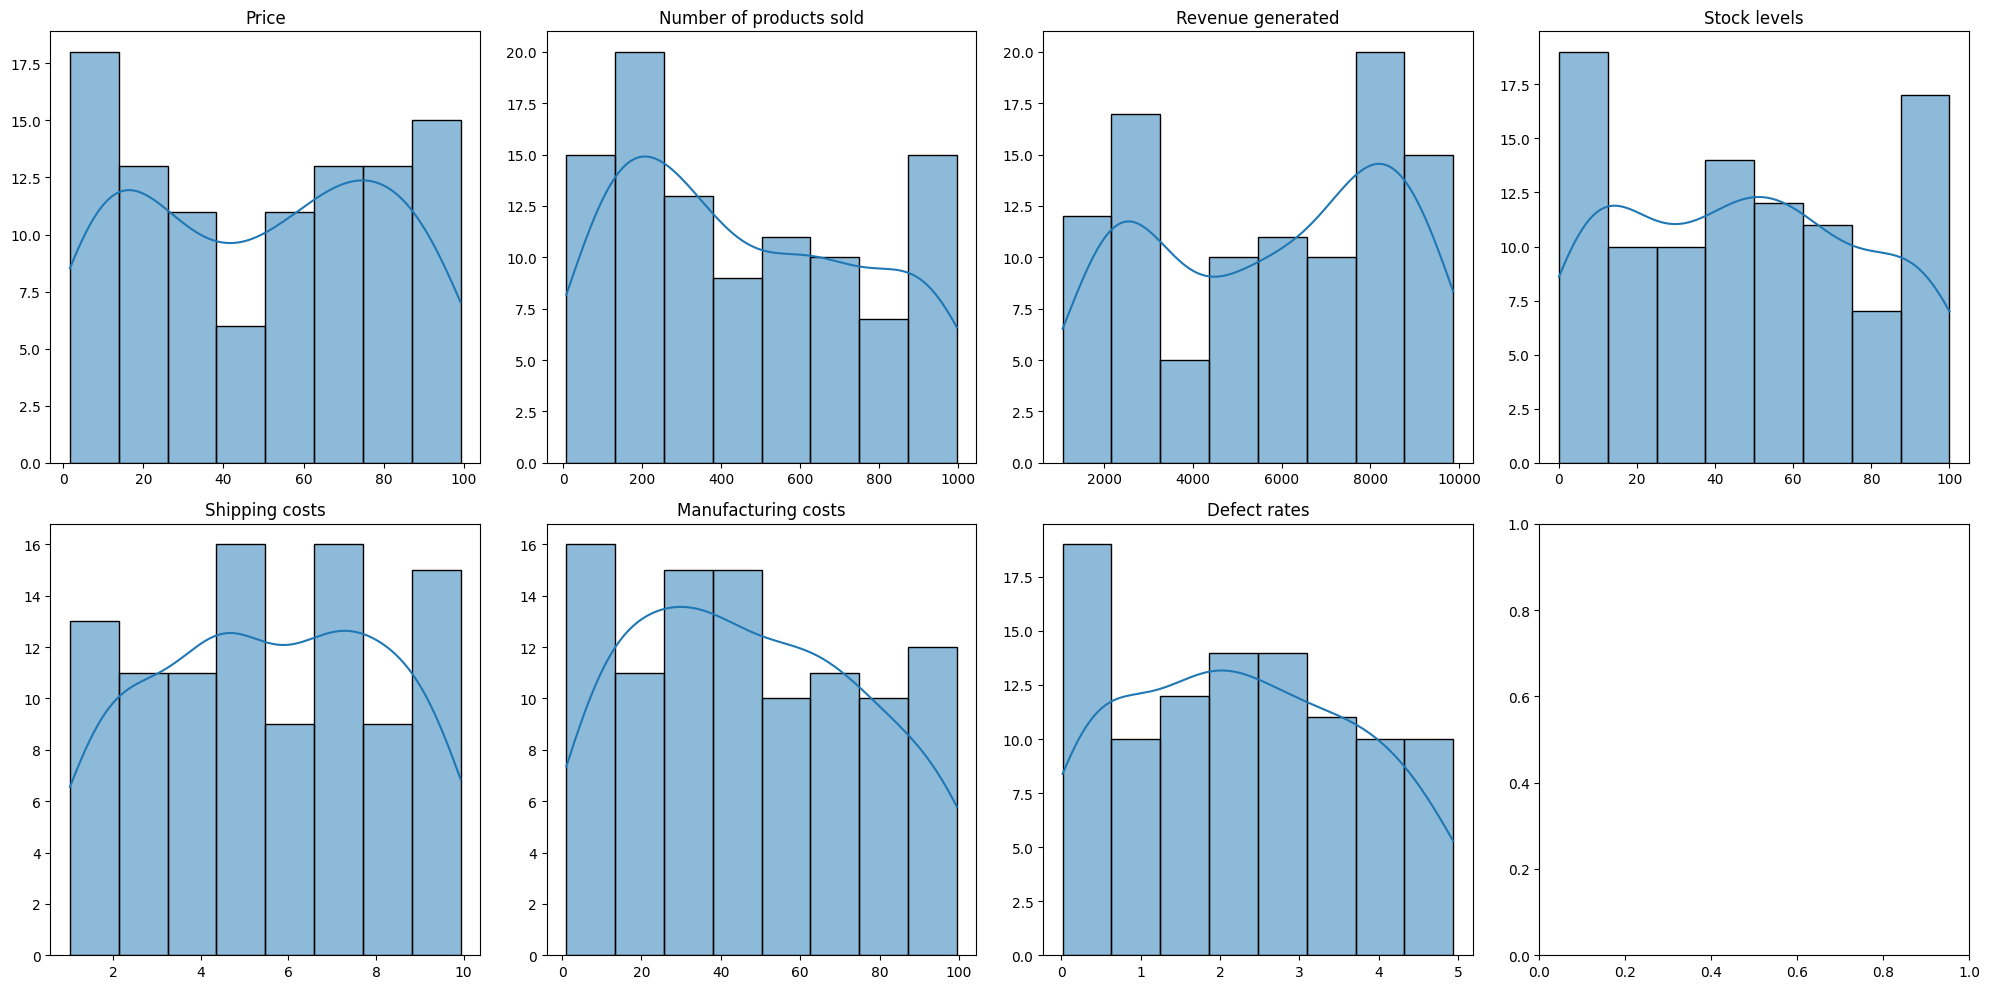

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/content/supply_chain_data.csv")

# Selecting columns for visualization
selected_columns = ['Price', 'Number of products sold', 'Revenue generated', 'Stock levels',
                    'Shipping costs', 'Manufacturing costs', 'Defect rates']

# Creating subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

# Flatten the axes array
axes = axes.flatten()

# Plotting each selected column
for i, column in enumerate(selected_columns):
    sns.histplot(df[column], ax=axes[i], kde=True)
    axes[i].set_title(column)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Adjust layout
plt.tight_layout()
plt.show()

In [10]:
# Frequency distribution for categorical variables
categorical_variables = ['Product type', 'Customer demographics', 'Shipping carriers', 'Supplier name', 'Location', 'Inspection results', 'Transportation modes', 'Routes']
frequency_distribution = {}

for col in categorical_variables:
    frequency_distribution[col] = df[col].value_counts()

print("\nFrequency Distribution for Categorical Variables:")
for col, freq_dist in frequency_distribution.items():
    print(f"\n{col}:")
    print(freq_dist)


Frequency Distribution for Categorical Variables:

Product type:
Product type
skincare     40
haircare     34
cosmetics    26
Name: count, dtype: int64

Customer demographics:
Customer demographics
Unknown       31
Female        25
Non-binary    23
Male          21
Name: count, dtype: int64

Shipping carriers:
Shipping carriers
Carrier B    43
Carrier C    29
Carrier A    28
Name: count, dtype: int64

Supplier name:
Supplier name
Supplier 1    27
Supplier 2    22
Supplier 5    18
Supplier 4    18
Supplier 3    15
Name: count, dtype: int64

Location:
Location
Kolkata      25
Mumbai       22
Chennai      20
Bangalore    18
Delhi        15
Name: count, dtype: int64

Inspection results:
Inspection results
Pending    41
Fail       36
Pass       23
Name: count, dtype: int64

Transportation modes:
Transportation modes
Road    29
Rail    28
Air     26
Sea     17
Name: count, dtype: int64

Routes:
Routes
Route A    43
Route B    37
Route C    20
Name: count, dtype: int64


/tmp/ipython-input-3876245983.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # Rotate for readability
/tmp/ipython-input-3876245983.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # Rotate for readability
/tmp/ipython-input-3876245983.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # Rotate for readability
/tmp/ipython-input-3876245983.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha

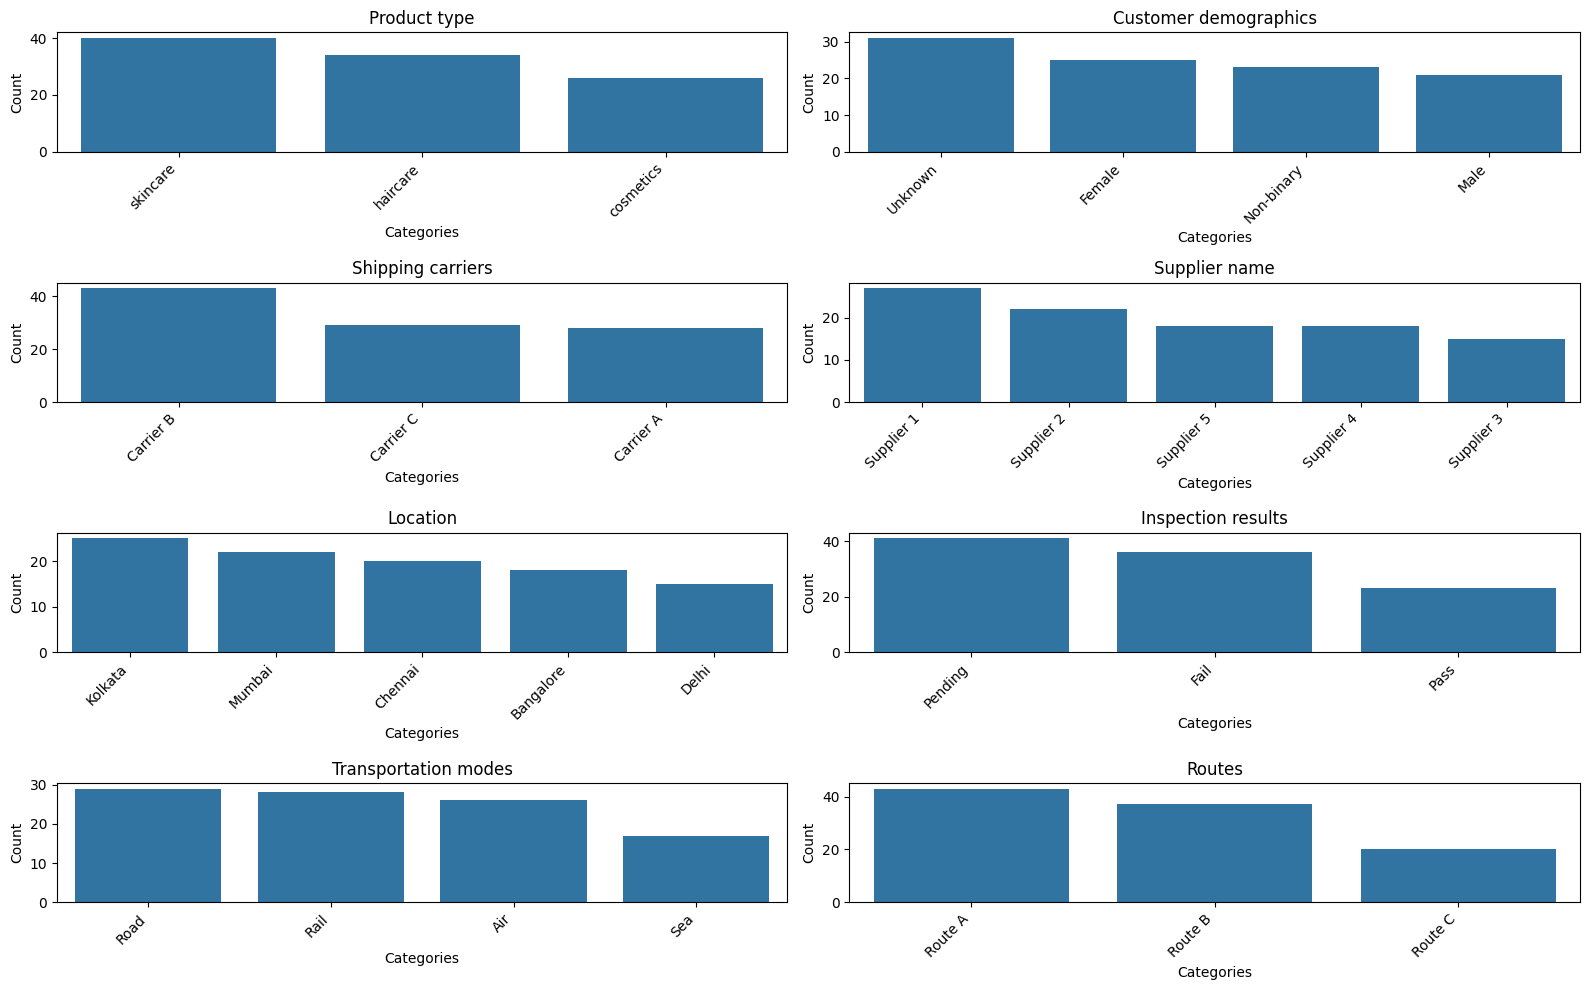

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming categorical_variables is a list of categorical columns
num_plots = len(categorical_variables)
num_cols = 2  # Number of columns in the subplot grid
num_rows = (num_plots + num_cols - 1) // num_cols  # Number of rows in the subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 10))
axes = axes.flatten()

# Plot each categorical variable distribution
for i, col in enumerate(categorical_variables):
    if col in frequency_distribution:  # Ensure key exists in frequency_distribution
        freq_dist = frequency_distribution[col]
        ax = axes[i]
        sns.barplot(x=freq_dist.index, y=freq_dist.values, ax=ax)
        ax.set_title(col)
        ax.set_xlabel("Categories")
        ax.set_ylabel("Count")
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # Rotate for readability

# Hide empty subplots if any
for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

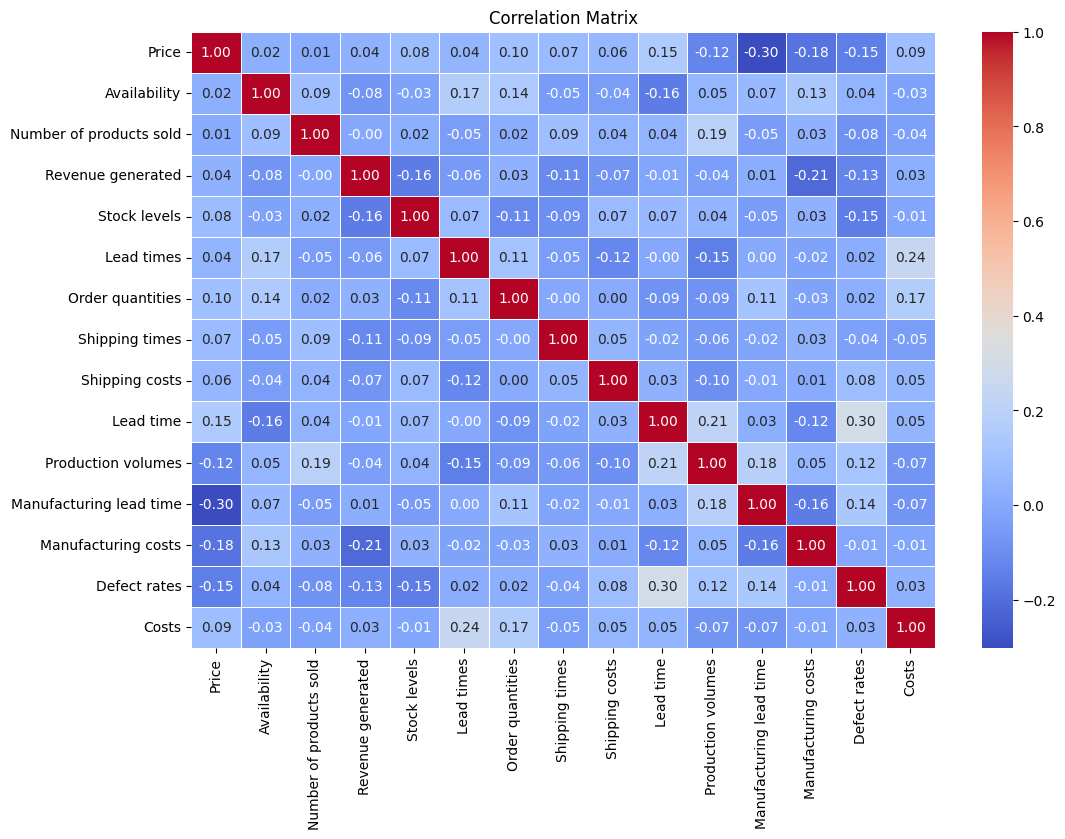

In [12]:
# Define numerical variables and compute correlation matrix
numerical_variables = ['Price', 'Availability', 'Number of products sold', 'Revenue generated', 'Stock levels', 'Lead times', 'Order quantities', 'Shipping times', 'Shipping costs', 'Lead time', 'Production volumes', 'Manufacturing lead time', 'Manufacturing costs', 'Defect rates', 'Costs']
correlation_matrix = df[numerical_variables].corr(method='pearson')

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [13]:
data['Product type'].unique()

array(['haircare', 'skincare', 'cosmetics'], dtype=object)

In [14]:
data['Transportation modes'].unique()

array(['Road', 'Air', 'Rail', 'Sea'], dtype=object)

In [15]:
data['Routes'].unique()

array(['Route B', 'Route C', 'Route A'], dtype=object)

In [16]:
data['Customer demographics'].unique()

array(['Non-binary', 'Female', 'Unknown', 'Male'], dtype=object)

In [17]:
data['Location'].unique()

array(['Mumbai', 'Kolkata', 'Delhi', 'Bangalore', 'Chennai'], dtype=object)

In [18]:
fig = px.scatter(data,x='Price',y='Revenue generated',
                color='Product type',
                hover_data = ['Number of products sold'],
                trendline='ols')
fig.show()

In [19]:
sales_data = data.groupby('Product type')['Number of products sold'].sum().reset_index()
sales_data

,Product type,Number of products sold
0,cosmetics,11757
1,haircare,13611
2,skincare,20731


In [20]:
pie_chart = px.pie(sales_data, values='Number of products sold', names='Product type',
                  title='Sales by Product Type',
                  hover_data=['Number of products sold'],
                  hole=0.45,
                  color_discrete_sequence=px.colors.qualitative.Pastel)
pie_chart.update_traces(textposition='inside',textinfo='percent')
pie_chart.show()

In [21]:
trans_data = data.groupby('Transportation modes')['Number of products sold'].sum().reset_index()

pie_chart = px.pie(trans_data,values='Number of products sold', names='Transportation modes',
                  title='Sales by Product Type',
                  hover_data=['Number of products sold'],
                  hole=0.5,
#                   color_discrete_sequence=px.colors.qualitative.Pastel
                  )
pie_chart.update_traces(textposition='inside',textinfo='percent+label')
pie_chart.show()

In [22]:
total_revenue = data.groupby('Shipping carriers')['Revenue generated'].sum().reset_index()

fig = go.Figure()
fig.add_trace(go.Bar(x=total_revenue['Shipping carriers'],
                     y=total_revenue['Revenue generated']))
fig.update_layout(title='Total revenue by shipping carrier',
                 xaxis_title='Shipping carrier',
                 yaxis_title='Revenue Generated')
fig.show()

In [23]:
total_revenue = data.groupby('Location')['Revenue generated'].sum().reset_index()

fig = go.Figure()
fig.add_trace(go.Bar(x=total_revenue['Location'],
                    y=total_revenue['Revenue generated']))
fig.update_layout(title='Total Revenue based on location',
                 xaxis_title='Locations',
                 yaxis_title='Revenue generated')
fig.show()

In [24]:
total_revenue = data.groupby('Transportation modes')['Revenue generated'].sum().reset_index()

fig = go.Figure()
fig.add_trace(go.Bar(x=total_revenue['Transportation modes'],
                    y=total_revenue['Revenue generated']))
fig.update_layout(title='Total Revenue based on location',
                 xaxis_title='Transportation modes',
                 yaxis_title='Revenue generated')
fig.show()

In [25]:
avg_lead_time = data.groupby('Product type')['Lead time'].mean().reset_index()
avg_manufacturing_time = data.groupby('Product type')['Manufacturing costs'].mean().reset_index()
result = pd.merge(avg_lead_time,avg_manufacturing_time, on ='Product type')
result.rename(columns={'Lead time':'Avg lead time','Manufacturing time':'Avg manufacturing time'}, inplace=True)
result

,Product type,Avg lead time,Manufacturing costs
0,cosmetics,13.538462,43.052740
1,haircare,18.705882,48.457993
2,skincare,18.000000,48.993157


In [26]:
shipping_cost_chart = px.bar(data,x='Shipping carriers',
                            y='Shipping costs',
                            title='Shipping Costs by Carrier')
shipping_cost_chart.show()

In [27]:
transportation_chart = px.pie(data,
                             values='Costs',
                             names='Transportation modes',
                             title='Cost Distribution by Transportation Mode',
                             hole=0.5,
                             color_discrete_sequence=px.colors.qualitative.Pastel)
transportation_chart.update_traces(textposition='inside',textinfo='percent+label')
transportation_chart.show()


In [28]:
defect_rate_by_product = data.groupby('Product type')['Defect rates'].mean().reset_index()

fig = px.bar(defect_rate_by_product, x='Product type', y='Defect rates',
             title='Average defect rates by product type')
fig.show()

In [29]:
trans = data.groupby('Transportation modes')['Defect rates'].mean().reset_index()

trans_chart = px.pie(trans,values='Defect rates',
                    names='Transportation modes',
                    title='Defect Rates by Transportation Mode',
                    hole=0.5,
                    color_discrete_sequence=px.colors.qualitative.Pastel)
trans_chart.update_traces(textposition='inside',textinfo='label+percent')
trans_chart.show()

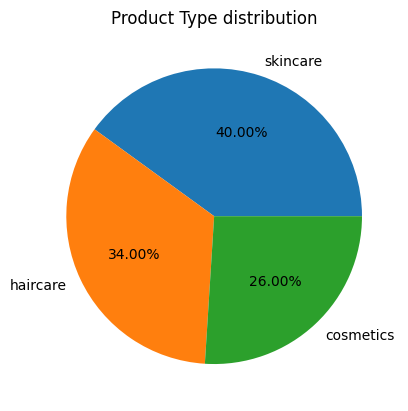

In [30]:
# Display product type distribution in the dataset.
pie_labels = data['Product type'].value_counts().index.to_list()
plt.pie(data['Product type'].value_counts(), autopct="%.2f%%", labels = pie_labels);
plt.title ("Product Type distribution");

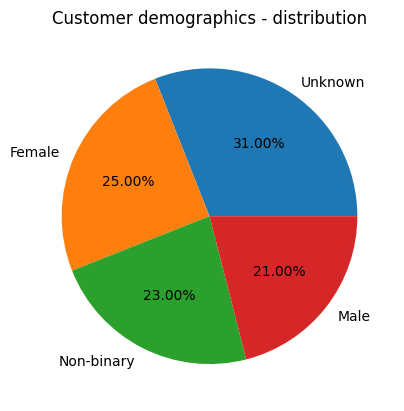

In [31]:
# Draw a plot for Customer demograohics
gender_labels = data['Customer demographics'].value_counts().index.to_list()
plt.pie(data['Customer demographics'].value_counts(), labels=gender_labels, autopct="%.2f%%");
plt.title("Customer demographics - distribution");

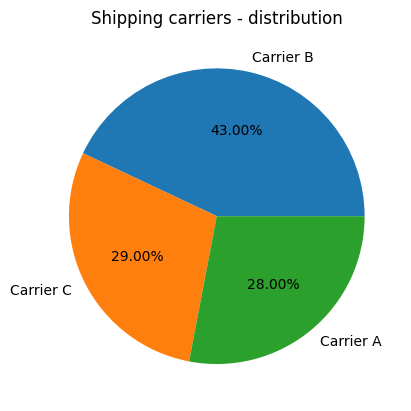

In [32]:
# Draw pie chart
carrier_labels = data['Shipping carriers'].value_counts().index.to_list()
plt.pie(data['Shipping carriers'].value_counts(), labels=carrier_labels, autopct="%.2f%%");
plt.title('Shipping carriers - distribution');

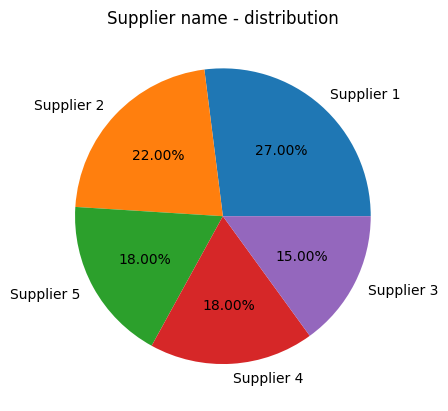

In [33]:
supplier_labels = data['Supplier name'].value_counts().index.to_list();
plt.pie(data['Supplier name'].value_counts(), labels=supplier_labels, autopct="%.2f%%");
plt.title('Supplier name - distribution');

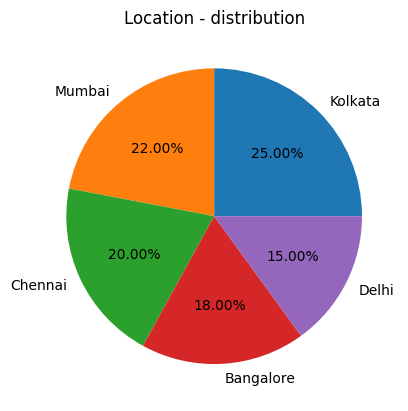

In [34]:
location_labels = data['Location'].value_counts().index.to_list()
plt.pie(data['Location'].value_counts(), labels=location_labels, autopct="%.2f%%");
plt.title ("Location - distribution");

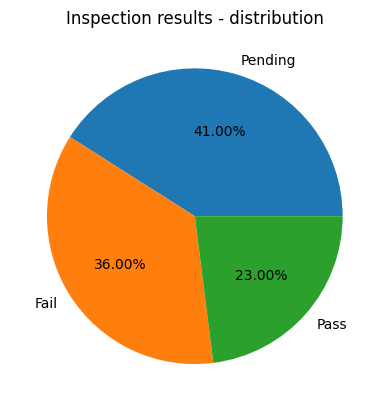

In [35]:
inspection_results_labels=data['Inspection results'].value_counts().index.to_list()

# Draw Pie chart
plt.pie(data['Inspection results'].value_counts(), labels=inspection_results_labels, autopct="%.2f%%");
plt.title("Inspection results - distribution");

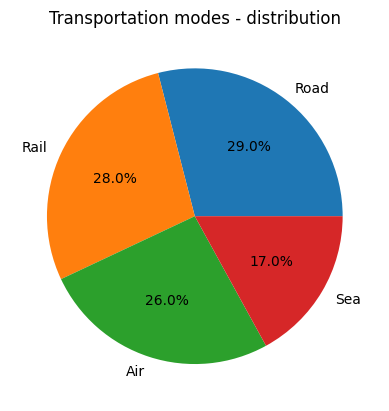

In [36]:
transportation_modes_labels=data['Transportation modes'].value_counts().index.to_list();

plt.pie(data['Transportation modes'].value_counts(), labels=transportation_modes_labels, autopct="%1.1f%%");
plt.title("Transportation modes - distribution");

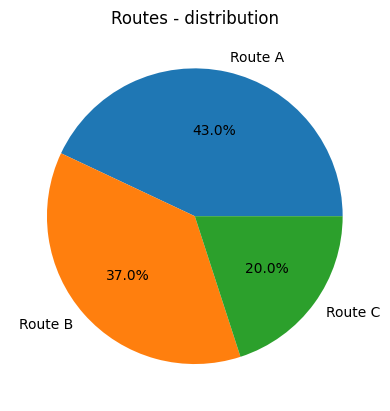

In [37]:
route_labels = data['Routes'].value_counts().index.to_list()

#Draw pie
plt.pie(data['Routes'].value_counts(), labels=route_labels, autopct="%1.1f%%");
plt.title("Routes - distribution");

Demand Forecasting

In [38]:
# Observations having high number of 'sold products'
data[["Product type","SKU","Number of products sold","Location"]].sort_values("Number of products sold", ascending=False).head(5)

,Product type,SKU,Number of products sold,Location
10,skincare,SKU10,996,Kolkata
94,cosmetics,SKU94,987,Delhi
9,skincare,SKU9,980,Chennai
36,skincare,SKU36,963,Delhi
37,skincare,SKU37,963,Kolkata


In [39]:
# Observations having lowest number of 'sold products'
data[["Product type","SKU","Number of products sold"]].sort_values("Number of products sold").head(5)

,Product type,SKU,Number of products sold
2,haircare,SKU2,8
45,haircare,SKU45,24
85,cosmetics,SKU85,25
48,haircare,SKU48,29
70,haircare,SKU70,32


Location rankings based on 'Product selling'

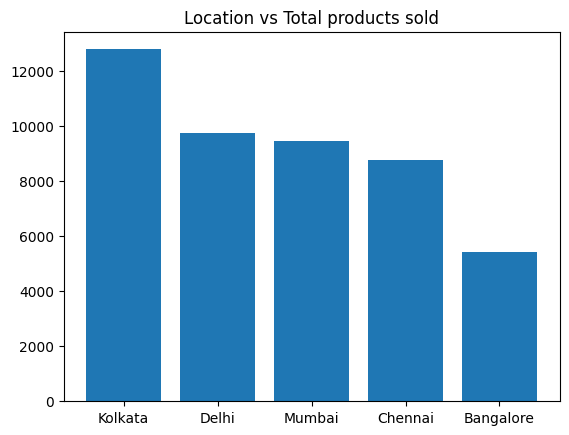

In [40]:
# Extract required fields to seperate data frame
df_loc_product_sell = data[["Location", "Number of products sold"]].copy()

#Group by location and include sum for each location groups
df_loc_product_sell=df_loc_product_sell.groupby('Location').sum()

# Rename the sum field
df_loc_product_sell.rename(columns={'Number of products sold':"SoldProducts"}, inplace=True)

# Sort the rows based on the sum of Sold products
df_loc_product_sell.sort_values(by="SoldProducts",ascending=False, inplace=True)

# Draw the bar graph
plt.bar(df_loc_product_sell.index, df_loc_product_sell['SoldProducts']);
plt.title("Location vs Total products sold");

Average sales of each product type per location

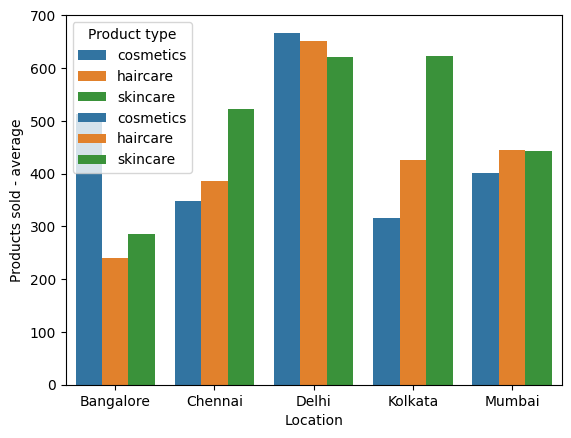

In [41]:
# Create seperate data frame with product type, number of products sold and location
df_product_type_location = data[["Product type","Location", "Number of products sold"]].copy()

# Find the mean value of 'Number of Products sold'
df_product_type_location = df_product_type_location.groupby(["Location","Product type"]).mean()

# Rename the mean value column
df_product_type_location.rename({"Number of products sold":"Products sold - average"},axis = 1, inplace=True)

# Reset the index
df_product_type_location.reset_index(inplace=True)

#Draw the bar graph
sns.barplot(data=df_product_type_location,
            x="Location",
            y="Products sold - average",
            hue="Product type");# Create seperate data frame with product type, number of products sold and location
df_product_type_location = data[["Product type","Location", "Number of products sold"]].copy()

# Find the mean value of 'Number of Products sold'
df_product_type_location = df_product_type_location.groupby(["Location","Product type"]).mean()

# Rename the mean value column
df_product_type_location.rename({"Number of products sold":"Products sold - average"},axis = 1, inplace=True)

# Reset the index
df_product_type_location.reset_index(inplace=True)

#Draw the bar graph
sns.barplot(data=df_product_type_location,
            x="Location",
            y="Products sold - average",
            hue="Product type");

Product types having more defect rates

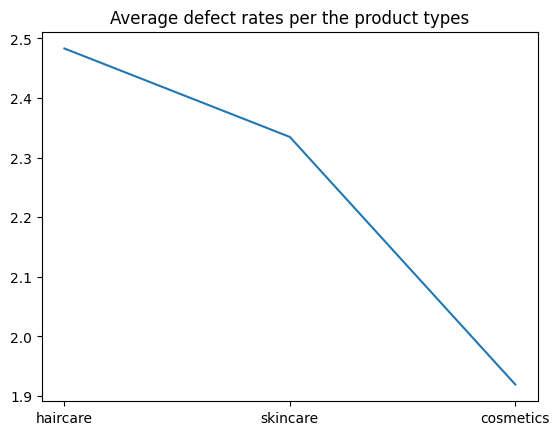

In [42]:
df_product_type_defect= data[['Product type','Defect rates']].copy()

#Group by product types
df_product_type_defect = df_product_type_defect.groupby('Product type').mean()

# Rename the Defect rates column
df_product_type_defect.rename(columns={'Defect rates':'Average defect rates'}, inplace=True)

# Sort the Average defect rates column
df_product_type_defect.sort_values(by="Average defect rates", ascending=False, inplace=True)

# Plot the line graph
plt.plot(df_product_type_defect);
plt.title("Average defect rates per the product types");

Transportation cost

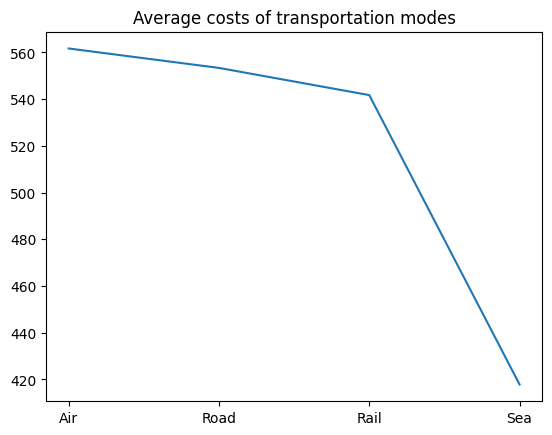

In [43]:
# Create a seperate data frame for Transportation cost analysis
df_transport_cost = data[["Product type", "Transportation modes", "Costs"]].copy()

# Segregate records based on the Transportation modes and find mean of each group
df_transport_cost = df_transport_cost.groupby('Transportation modes').mean('Costs')

# rename the mean field
df_transport_cost.rename(columns={"Costs":"Avg Costs"}, inplace=True)

#Sort the records based on the mean cost value
df_transport_cost.sort_values(by="Avg Costs",ascending=False, inplace=True)

# Visualize the average values of each transportation
plt.plot(df_transport_cost);
plt.title ("Average costs of transportation modes");

Lead times of each product type per supplier

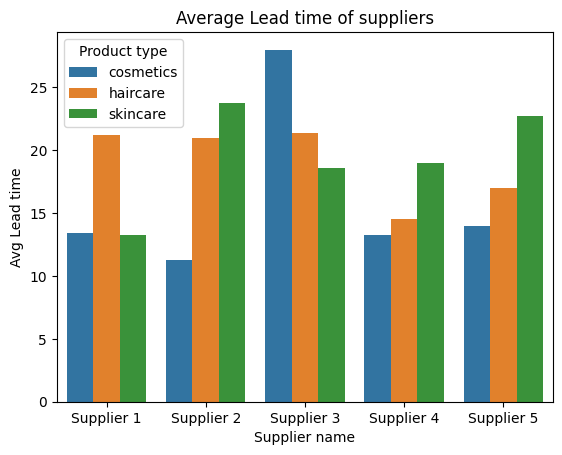

In [44]:
# Create new data frame
df_supplier_product_type = data[['Product type', 'Supplier name', 'Lead time']].copy()

# Group the columns based on the supplier name , product type and find the mean of 'lead time' of each sub group.
df_supplier_product_type = df_supplier_product_type.groupby(['Supplier name', 'Product type']).mean('Lead time')

# Rename the mean column of Lead time
df_supplier_product_type.rename(columns={'Lead time':'Avg Lead time'}, inplace=True)

#Reset the index
df_supplier_product_type.reset_index(inplace=True);

#Draw the bar graph
sns.barplot(data=df_supplier_product_type,
            x="Supplier name",
            y="Avg Lead time",
            hue="Product type"). set_title("Average Lead time of suppliers");

Product and Customer Analysis

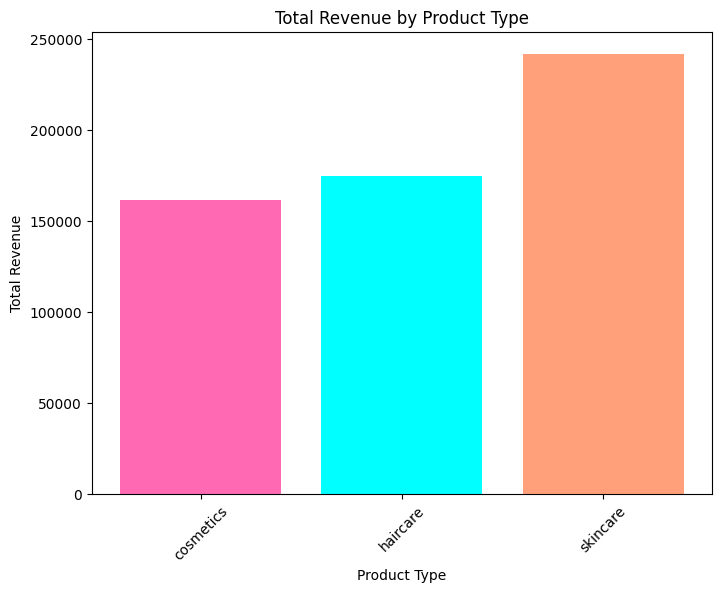

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors # Import mcolors

# Import data
df = pd.read_csv('/content/supply_chain_data.csv')

# Define custom colors for product type
# Use Matplotlib's color names or hex codes
my_colors = {'cosmetics': 'hotpink', 'haircare': mcolors.CSS4_COLORS['cyan'], 'skincare': 'lightsalmon'}

# Calculate Total Revenue by Product Type
total_revenue_by_product_type = df.groupby('Product type')['Revenue generated'].sum().reset_index()

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(total_revenue_by_product_type['Product type'], total_revenue_by_product_type['Revenue generated'], color=total_revenue_by_product_type['Product type'].map(my_colors))
plt.title('Total Revenue by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

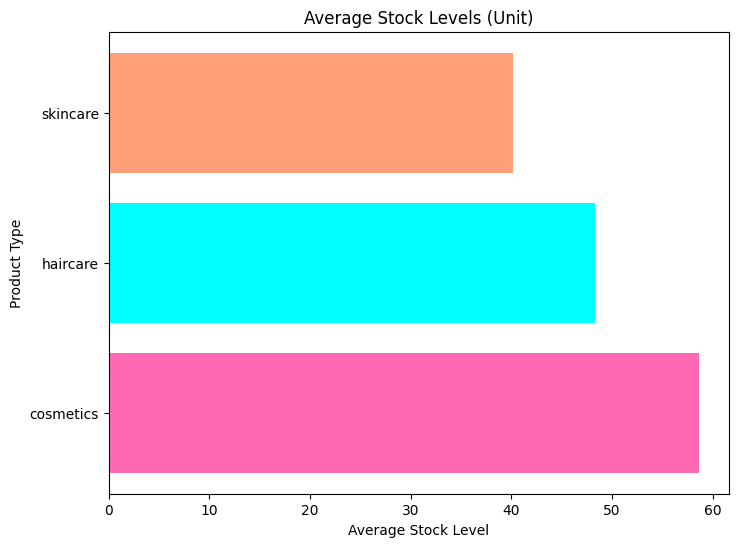

In [47]:
# Calculate Average Stock Level by Product Type
average_stock_level = data.groupby('Product type')['Stock levels'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.barh(average_stock_level['Product type'], average_stock_level['Stock levels'], color=average_stock_level['Product type'].map(my_colors))
plt.title('Average Stock Levels (Unit)')
plt.xlabel('Average Stock Level')
plt.ylabel('Product Type')
plt.show()


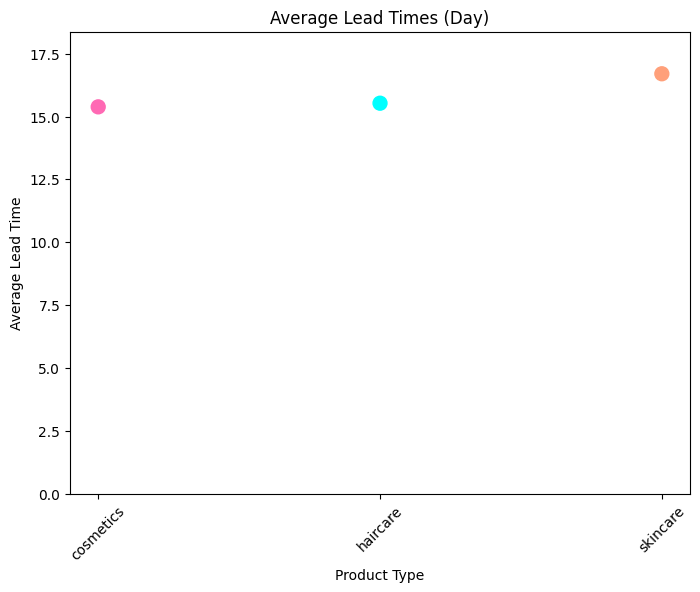

In [48]:
# Calculate Average Lead Times by Product Type
average_lead_times = data.groupby('Product type')['Lead times'].mean().reset_index()

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(average_lead_times['Product type'], average_lead_times['Lead times'], color=average_lead_times['Product type'].map(my_colors), s=100)  # Adjust point size as needed
plt.title('Average Lead Times (Day)')
plt.xlabel('Product Type')
plt.ylabel('Average Lead Time')
plt.xticks(rotation=45)
plt.ylim(0, average_lead_times['Lead times'].max() * 1.1)  # Adjust y-axis limits
plt.show()

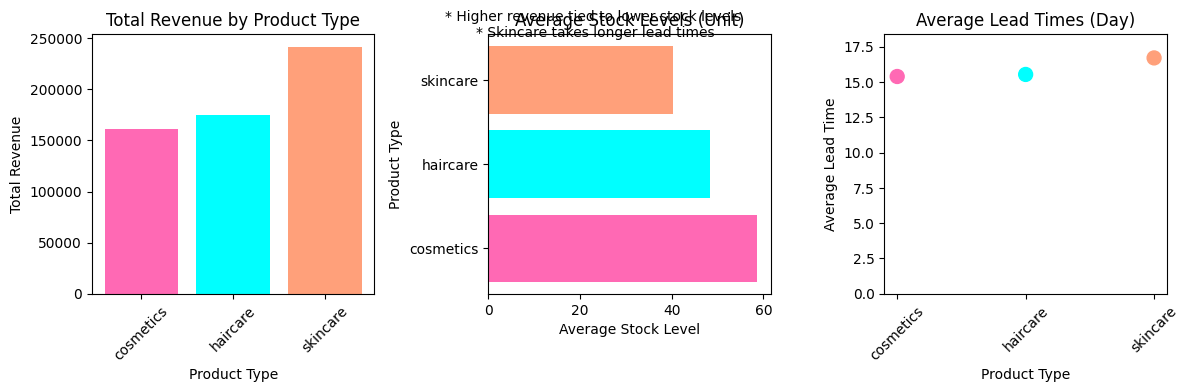

In [49]:
# Calculate Total Revenue by Product Type
total_revenue_by_product_type = data.groupby('Product type')['Revenue generated'].sum().reset_index()

# Calculate Average Stock Level by Product Type
average_stock_level = data.groupby('Product type')['Stock levels'].mean().reset_index()

# Calculate Average Lead Times by Product Type
average_lead_times = data.groupby('Product type')['Lead times'].mean().reset_index()

# Create the first subplot (Total Revenue)
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.bar(total_revenue_by_product_type['Product type'], total_revenue_by_product_type['Revenue generated'], color=total_revenue_by_product_type['Product type'].map(my_colors))
plt.title('Total Revenue by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)

# Create the second subplot (Average Stock Level)
plt.subplot(1, 3, 2)
plt.barh(average_stock_level['Product type'], average_stock_level['Stock levels'], color=average_stock_level['Product type'].map(my_colors))
plt.title('Average Stock Levels (Unit)')
plt.xlabel('Average Stock Level')
plt.ylabel('Product Type')

# Create the third subplot (Average Lead Times)
plt.subplot(1, 3, 3)
plt.scatter(average_lead_times['Product type'], average_lead_times['Lead times'], color=average_lead_times['Product type'].map(my_colors), s=100)
plt.title('Average Lead Times (Day)')
plt.xlabel('Product Type')
plt.ylabel('Average Lead Time')
plt.xticks(rotation=45)
plt.ylim(0, average_lead_times['Lead times'].max() * 1.1)

# Add a text annotation
plt.figtext(0.5, 0.9, "* Higher revenue tied to lower stock levels \n* Skincare takes longer lead times", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

Predictive Analytics for Future Planning

In [50]:
import pandas as pd
import statsmodels.api as sm

# Create the linear regression model
X = data[['Price', 'Number of products sold', 'Lead times']]
X = sm.add_constant(X)  # Add a constant term
y = data['Availability']

model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Availability   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.274
Date:                Sun, 14 Sep 2025   Prob (F-statistic):              0.288
Time:                        13:19:27   Log-Likelihood:                -482.01
No. Observations:                 100   AIC:                             972.0
Df Residuals:                      96   BIC:                             982.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

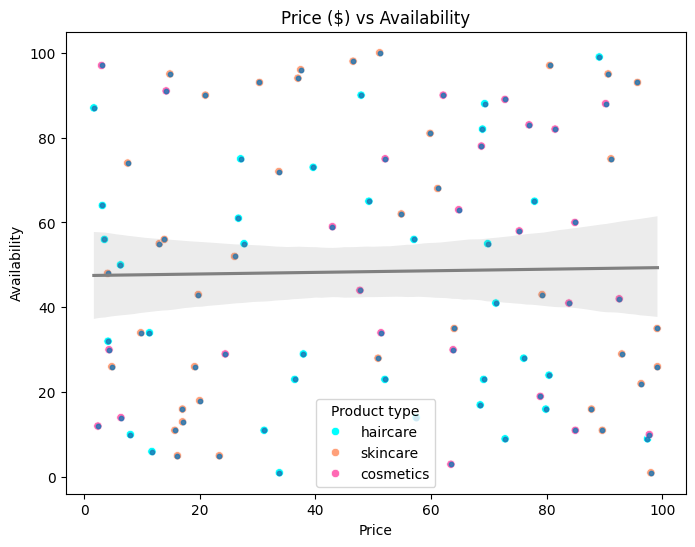

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Price', y='Availability', hue='Product type', data=data, palette=my_colors)
sns.regplot(x='Price', y='Availability', data=data, scatter_kws={'s': 10}, line_kws={'color': 'gray'})

plt.title('Price ($) vs Availability')
plt.show()

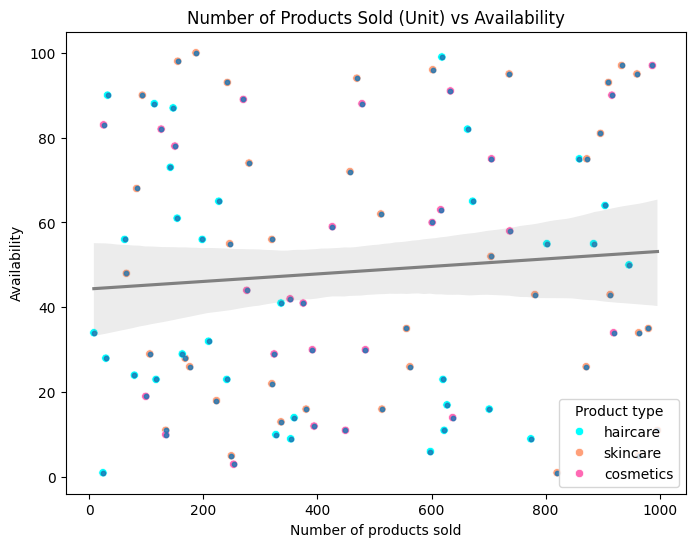

In [52]:
# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Number of products sold', y='Availability', hue='Product type', data=data, palette=my_colors)
sns.regplot(x='Number of products sold', y='Availability', data=data, scatter_kws={'s': 10}, line_kws={'color': 'gray'})

plt.title('Number of Products Sold (Unit) vs Availability')
plt.show()

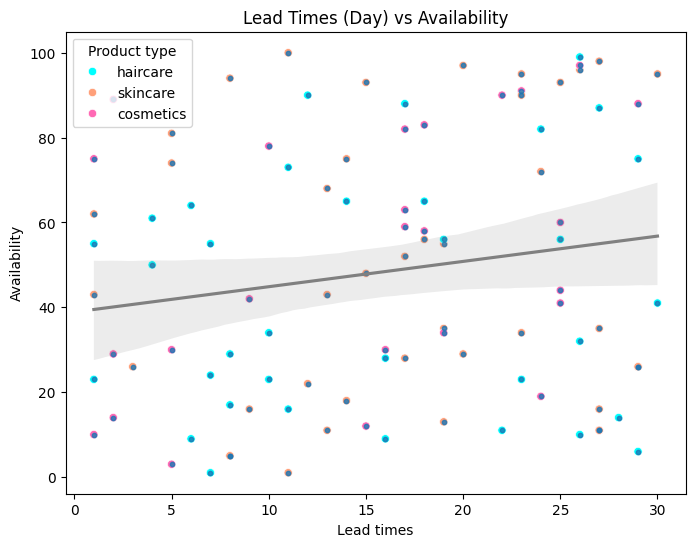

In [53]:
# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Lead times', y='Availability', hue='Product type', data=data, palette=my_colors)
sns.regplot(x='Lead times', y='Availability', data=data, scatter_kws={'s': 10}, line_kws={'color': 'gray'})

plt.title('Lead Times (Day) vs Availability')
plt.show()

Supply Chain Performance Evaluation

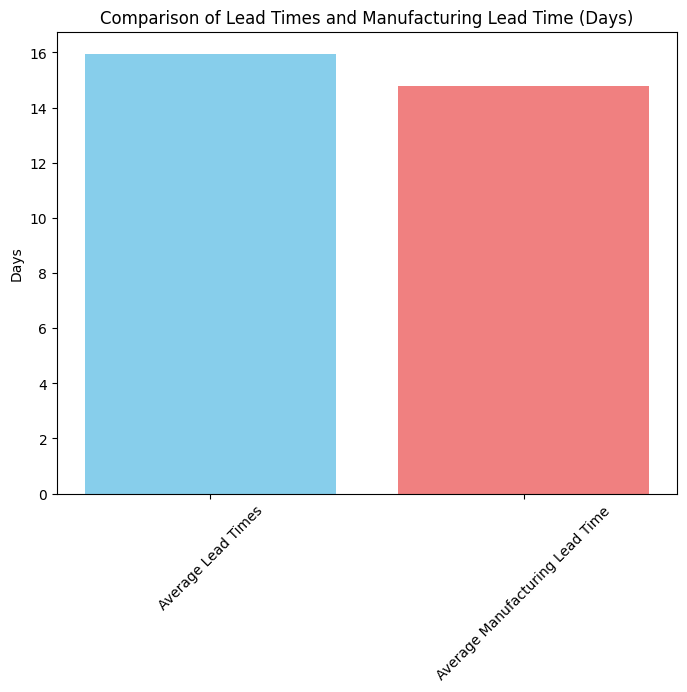

In [55]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load Data
data = pd.read_csv('/content/supply_chain_data.csv')

# Calculate average lead times and manufacturing lead times
average_lead_time = data['Lead times'].mean()
average_manufacturing_lead_time = data['Manufacturing lead time'].mean()

# Create a DataFrame for visualization
df = pd.DataFrame({
    'Category': ['Average Lead Times', 'Average Manufacturing Lead Time'],
    'Value': [average_lead_time, average_manufacturing_lead_time]
})

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(df['Category'], df['Value'], color=['skyblue', 'lightcoral'])
plt.title('Comparison of Lead Times and Manufacturing Lead Time (Days)')
plt.ylabel('Days')
plt.xticks(rotation=45)
plt.show()

In [56]:
!pip install plotly pandas

In [57]:
!pip install -U kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 4.0 MB/s eta 0:00:00


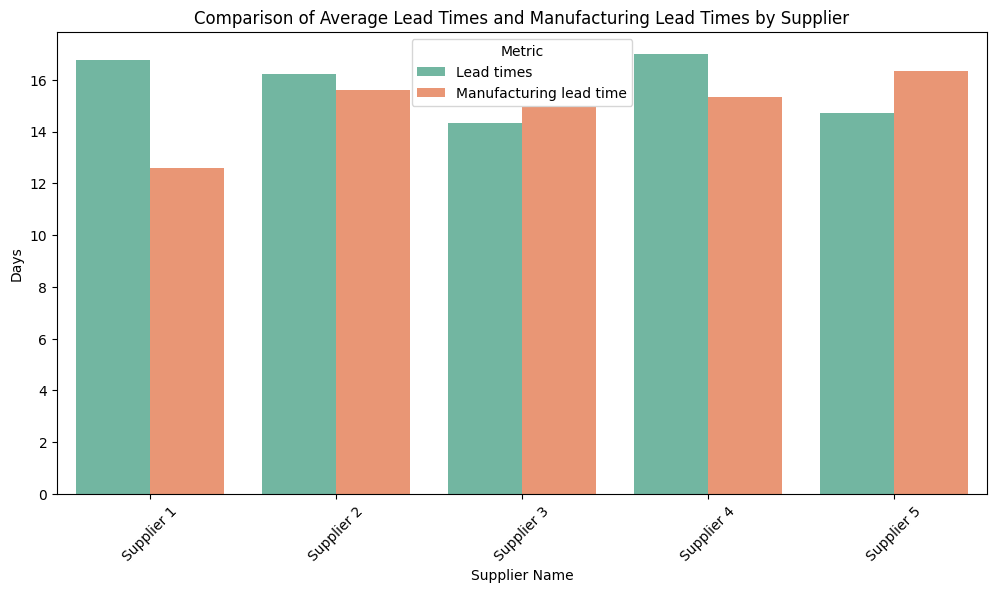

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv("/content/supply_chain_data.csv")

# Group the data by supplier and calculate average lead times and manufacturing lead times
supplier_performance = data.groupby('Supplier name').agg({
    'Lead times': 'mean',
    'Manufacturing lead time': 'mean'
}).reset_index()

# Create a multi-bar chart
plt.figure(figsize=(12, 6))
# Change 'variable' to 'Metric' in the hue parameter
sns.barplot(x='Supplier name', y='value', hue='Metric', data=supplier_performance.melt(id_vars='Supplier name', var_name='Metric', value_name='value'), palette='Set2')
plt.title('Comparison of Average Lead Times and Manufacturing Lead Times by Supplier')
plt.xlabel('Supplier Name')
plt.ylabel('Days')
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.show()

In [60]:
!pip install -U kaleido

In [61]:
import kaleido

/usr/local/lib/python3.12/dist-packages/kaleido/_sync_server.py:11: UserWarning:




This means that static image generation (e.g. `fig.write_image()`) will not work.

Please upgrade Plotly to version 6.1.1 or greater, or downgrade Kaleido to version 0.2.1.




In [62]:
import pandas as pd
import plotly.express as px
import numpy as np
import kaleido #import kaleido

data = pd.read_csv("/content/supply_chain_data.csv")

# Risk Assessment Analysis
risk_assessment = (
    data.groupby("Supplier name", as_index=False).agg(
        Average_Lead_Times=("Lead times", "mean"),
        SD_Lead_Times=("Lead times", "std"),
        Average_Defect_Rate=("Defect rates", "mean"),
        SD_Defect_Rate=("Defect rates", "std"),
        Pass_Rate=("Inspection results", lambda x: (x == "Pass").mean() * 100),
        Fail_Rate=("Inspection results", lambda x: (x == "Fail").mean() * 100),
        Pending_Rate=("Inspection results", lambda x: (x == "Pending").mean() * 100),
    )
)

# Visualization: Risk Assessment
fig = px.scatter(
    risk_assessment,
    x="Average_Lead_Times",
    y="Average_Defect_Rate",
    size="SD_Lead_Times",
    color="Supplier name",
    error_y="SD_Defect_Rate",
    title="Supplier Risk Assessment",
    labels={
        "Average_Lead_Times": "Average Lead Times (Day)",
        "Average_Defect_Rate": "Average Defect Rate (%)",
    },
    color_discrete_sequence=px.colors.qualitative.Set2,
)

# Customize axes to start at 0
fig.update_layout(
    xaxis=dict(range=[0, None]),
    yaxis=dict(range=[0, None]),
    template="plotly_white",
)

# Display the plot
fig.show()

Logistics Optimization Study

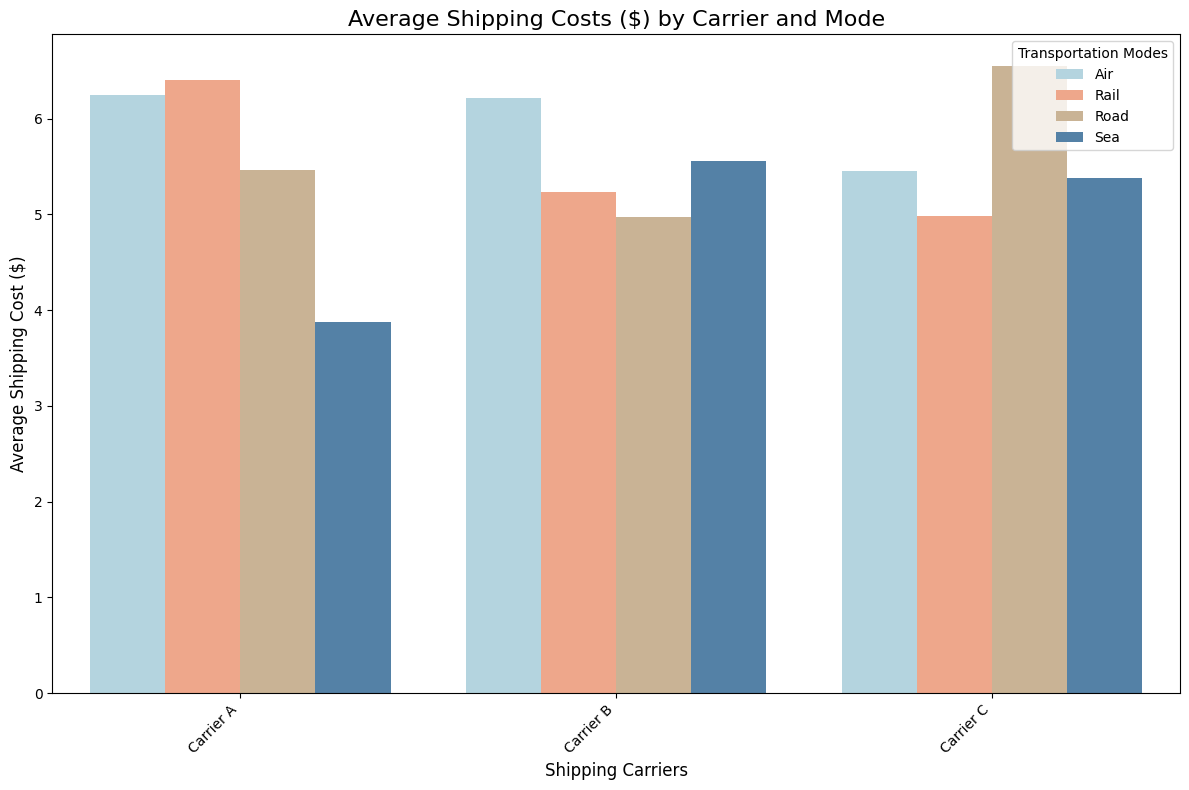

In [63]:
# Average Shipping Costs by Carrier and Mode
carrier_mode_cost_analysis = (
    data.groupby(["Shipping carriers", "Transportation modes"], as_index=False)
    .agg(Average_Shipping_Cost=("Shipping costs", "mean"))
)

# Define custom colors for transportation modes
colour_mode = {
    "Air": "lightblue",
    "Rail": "lightsalmon",
    "Road": "tan",
    "Sea": "steelblue",
}

# Create bar chart for average shipping costs
plt.figure(figsize=(12, 8))
sns.barplot(
    data=carrier_mode_cost_analysis,
    x="Shipping carriers",
    y="Average_Shipping_Cost",
    hue="Transportation modes",
    palette=colour_mode,
)

# Customize the plot
plt.title("Average Shipping Costs ($) by Carrier and Mode", fontsize=16)
plt.xlabel("Shipping Carriers", fontsize=12)
plt.ylabel("Average Shipping Cost ($)", fontsize=12)
plt.legend(title="Transportation Modes")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Show the plot
plt.show()

In [64]:
# Summary of transportation modes and routes
mode_route_summary = (
    data.groupby(["Transportation modes", "Routes"], as_index=False)
    .agg(
        Total_Costs=("Costs", "sum"),
        Average_Costs=("Costs", "mean"),
        Count=("Costs", "size"),
    )
)

# View the summary
print(mode_route_summary)

   Transportation modes   Routes  Total_Costs  Average_Costs  Count
0                   Air  Route A  5800.887460     527.353405     11
1                   Air  Route B  4464.858025     637.836861      7
2                   Air  Route C  4338.782012     542.347752      8
3                  Rail  Route A  6790.710511     485.050751     14
4                  Rail  Route B  7007.410741     637.037340     11
5                  Rail  Route C  1370.810306     456.936769      3
6                  Road  Route A  5934.412107     539.492010     11
7                  Road  Route B  7181.085147     552.391165     13
8                  Road  Route C  2932.696386     586.539277      5
9                   Sea  Route A  2349.764416     335.680631      7
10                  Sea  Route B  3386.030113     564.338352      6
11                  Sea  Route C  1367.130992     341.782748      4


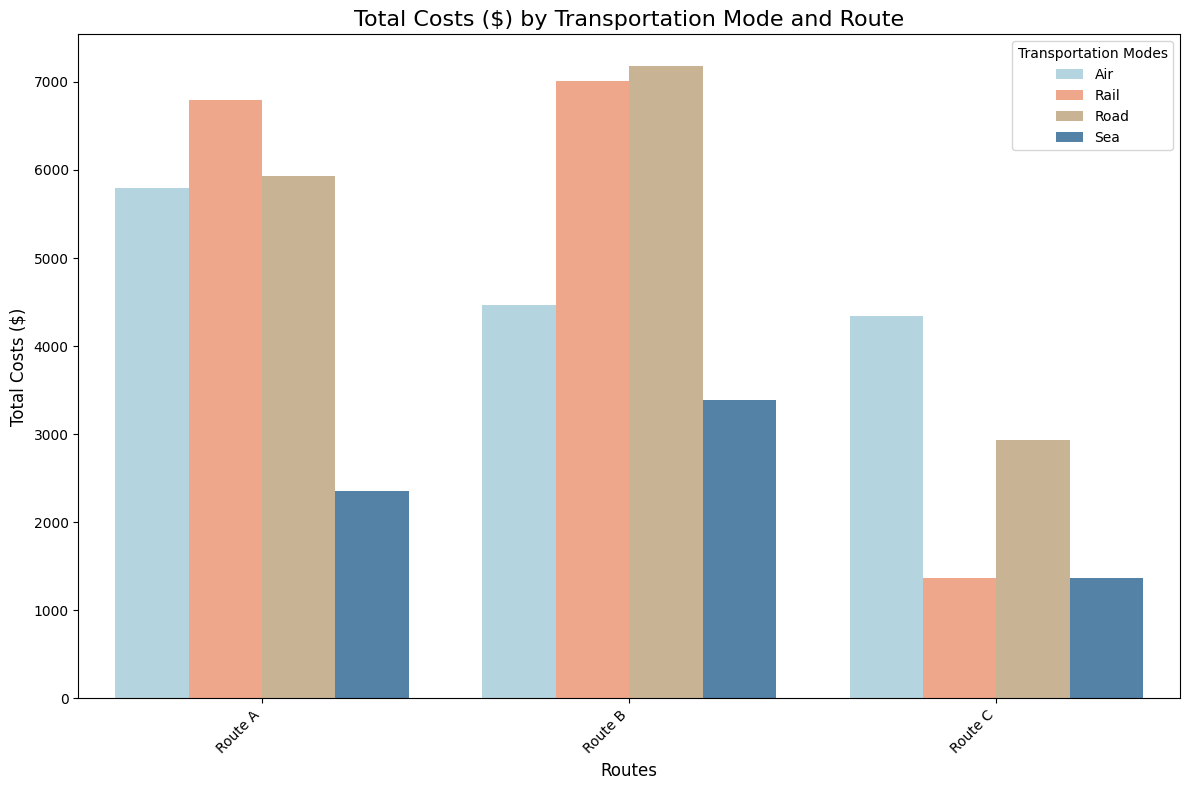

In [65]:
# Summary of transportation modes and routes
mode_route_summary = (
    data.groupby(["Transportation modes", "Routes"], as_index=False)
    .agg(Total_Costs=("Costs", "sum"))
)

# Define custom colors for transportation modes
colour_mode_darker = {
    "Air": "lightblue",
    "Rail": "lightsalmon",
    "Road": "tan",
    "Sea": "steelblue",
}

# Create bar chart for Costs by Route and Mode
plt.figure(figsize=(12, 8))
sns.barplot(
    data=mode_route_summary,
    x="Routes",
    y="Total_Costs",
    hue="Transportation modes",
    palette=colour_mode_darker,
)

# Customize the plot
plt.title("Total Costs ($) by Transportation Mode and Route", fontsize=16)
plt.xlabel("Routes", fontsize=12)
plt.ylabel("Total Costs ($)", fontsize=12)
plt.legend(title="Transportation Modes")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Show the plot
plt.show()

In [66]:
# Efficiency Analysis by Route
efficiency_analysis = (
    data.groupby("Routes", as_index=False)
    .agg(
        Average_Cost=("Costs", "mean"),
        Shipments=("Costs", "size"),  # Count the number of shipments
    )
)

# Calculate Efficiency Score
efficiency_analysis["Efficiency_Score"] = (
    efficiency_analysis["Shipments"] / efficiency_analysis["Average_Cost"]
)

# View the efficiency analysis
print(efficiency_analysis)

    Routes  Average_Cost  Shipments  Efficiency_Score
0  Route A    485.483128         43          0.088572
1  Route B    595.659028         37          0.062116
2  Route C    500.470985         20          0.039962


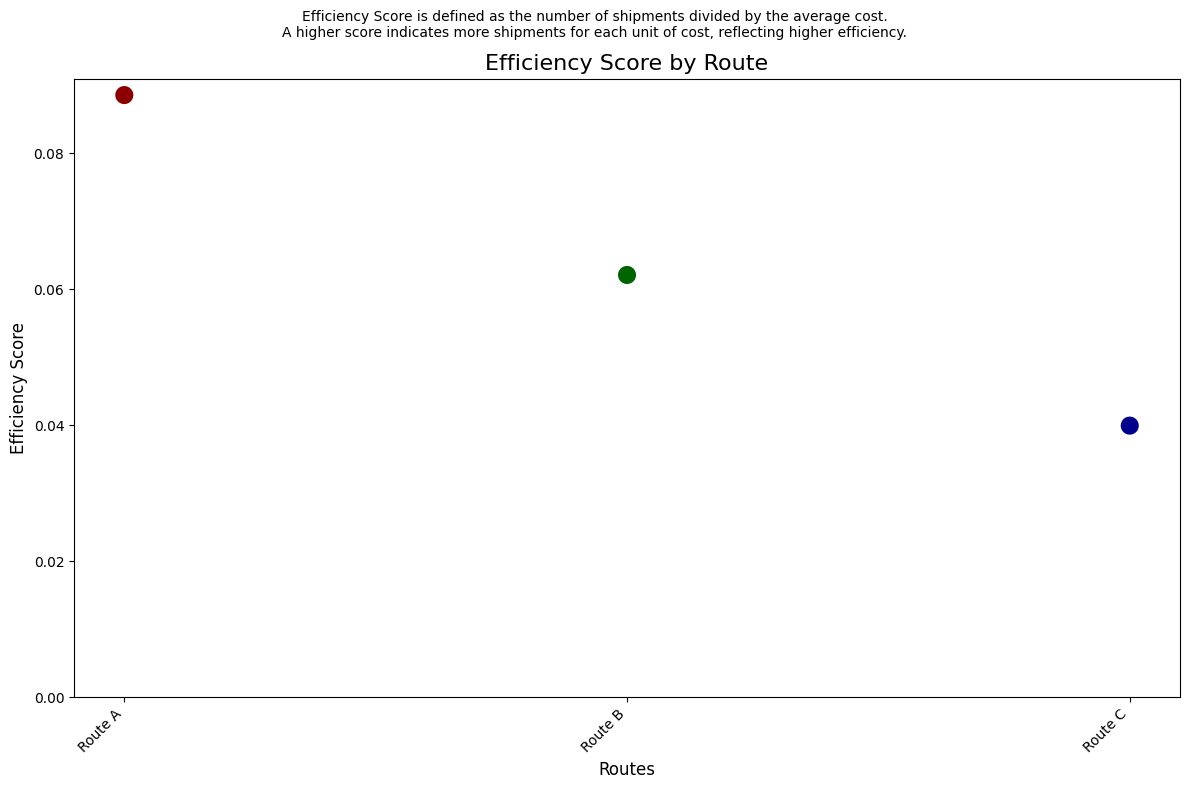

In [67]:
# Efficiency Analysis by Route
efficiency_analysis = (
    data.groupby("Routes", as_index=False)
    .agg(
        Average_Cost=("Costs", "mean"),
        Shipments=("Costs", "size"),  # Count the number of shipments
    )
)

# Calculate Efficiency Score
efficiency_analysis["Efficiency_Score"] = (
    efficiency_analysis["Shipments"] / efficiency_analysis["Average_Cost"]
)

# Define custom colors for Routes (adjust as needed)
route_colors = ["darkred", "darkgreen", "darkblue"]

# Create scatter plot for Efficiency Score by Route
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=efficiency_analysis,
    x="Routes",
    y="Efficiency_Score",
    hue="Routes",
    palette=route_colors,
    s=200,  # Adjust size of points
    legend=False  # Remove legend
)

# Customize the plot
plt.title("Efficiency Score by Route", fontsize=16)
plt.suptitle(
    "Efficiency Score is defined as the number of shipments divided by the average cost.\nA higher score indicates more shipments for each unit of cost, reflecting higher efficiency.",
    fontsize=10,
)
plt.xlabel("Routes", fontsize=12)
plt.ylabel("Efficiency Score", fontsize=12)
plt.ylim(0, None)  # Set y-axis to start from 0
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Show the plot
plt.show()

/tmp/ipython-input-4050392539.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




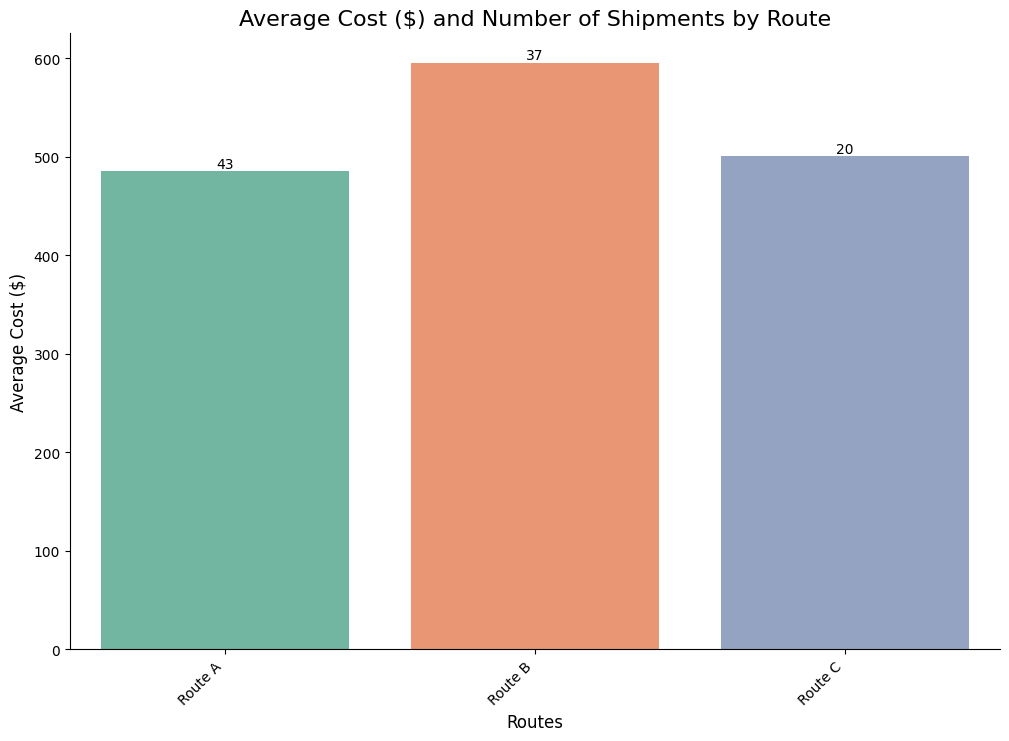

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Efficiency Analysis by Route
efficiency_analysis = (
    data.groupby("Routes", as_index=False)
    .agg(
        Average_Cost=("Costs", "mean"),
        Shipments=("Costs", "size"),  # Count the number of shipments
    )
)

# Create bar chart for Average Cost and Shipments by Route
plt.figure(figsize=(12, 8))
bars = sns.barplot(
    data=efficiency_analysis,
    x="Routes",
    y="Average_Cost",
    palette="Set2",  # Use a predefined color palette
)

# Add text annotations for shipments
for bar, shipments in zip(bars.patches, efficiency_analysis["Shipments"]):
    bar_height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X-coordinate (center of the bar)
        bar_height + 0.2,  # Slightly above the bar
        f"{shipments}",  # Display number of shipments
        ha="center",
        va="bottom",
        fontsize=10,
    )

# Customize the plot
plt.title("Average Cost ($) and Number of Shipments by Route", fontsize=16)
plt.xlabel("Routes", fontsize=12)
plt.ylabel("Average Cost ($)", fontsize=12)
plt.ylim(0, None)  # Ensure y-axis starts from 0
plt.xticks(rotation=45, ha="right")
sns.despine()  # Remove unnecessary spines

# Show the plot
plt.show()

In [69]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load the data
data = pd.read_csv("/content/supply_chain_data.csv")

# List of categorical variables (replace with the appropriate column names from your dataset)
categorical_variables = ['Product type', 'Availability', 'Customer demographics',
                         'Shipping carriers', 'Supplier name', 'Location',
                         'Transportation modes', 'Routes']  # List of categorical columns

# Dictionary to store chi-square results
chi_square_results = {}

# Perform chi-square test for each categorical variable
for col in categorical_variables:
    # Create a contingency table between the categorical variable and another categorical column
    # Replace 'Shipping carriers' with the column you want to test against
    contingency_table = pd.crosstab(data[col], data['Shipping carriers'])  # Example with 'Shipping carriers' column

    # Perform the chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Store the results
    chi_square_results[col] = {'chi2_statistic': chi2, 'p_value': p}

# Print the results
print("\nCategorical Variable Analysis (Chi-square test):")
for col, result in chi_square_results.items():
    print(f"\n{col}:")
    print("Chi-square Statistic:", result['chi2_statistic'])
    print("p-value:", result['p_value'])


Categorical Variable Analysis (Chi-square test):

Product type:
Chi-square Statistic: 6.265831790738626
p-value: 0.18015589680335498

Availability:
Chi-square Statistic: 132.26744186046514
p-value: 0.2891501831636821

Customer demographics:
Chi-square Statistic: 3.7144861284929287
p-value: 0.7152485558929267

Shipping carriers:
Chi-square Statistic: 200.0
p-value: 3.75727673578106e-42

Supplier name:
Chi-square Statistic: 7.938603393695616
p-value: 0.43949044460342135

Location:
Chi-square Statistic: 5.025175572890086
p-value: 0.7548819740396685

Transportation modes:
Chi-square Statistic: 10.179724900155355
p-value: 0.11728461162614506

Routes:
Chi-square Statistic: 3.3590871301143395
p-value: 0.4996251825458988


In [70]:
import pandas as pd
import pulp

# Sample Data (Replace with your actual data)
mock_data = pd.DataFrame({
    'SKU': ['Product1', 'Product2', 'Product3'],
    'Shipping costs': [5, 3, 8],
    'Shipping times': [2, 4, 3],
    'Order quantities': [10, 5, 15]
})

# Define Problem
prob = pulp.LpProblem("ShippingOptimization", pulp.LpMinimize)

# Define Decision Variables
order_vars = [pulp.LpVariable(f"Order_{i}", cat='Binary') for i in range(len(mock_data))]

# Objective Function: Minimize the total shipping cost
prob += pulp.lpSum([mock_data['Shipping costs'][i] * order_vars[i] for i in range(len(mock_data))]), "TotalShippingCost"

# Constraints
# Constraint 1: Total Shipping cost <= 1000 (for example)
prob += pulp.lpSum([mock_data['Shipping costs'][i] * order_vars[i] for i in range(len(mock_data))]) <= 1000, "MaxShippingCost"

# Constraint 2: Some other constraints can be added based on your requirements
# For example: Ensure at least one product is ordered
prob += pulp.lpSum(order_vars) >= 1, "MinProductsOrdered"

# Solve the Problem
prob.solve()

# Check solver status
if pulp.LpStatus[prob.status] != 'Optimal':
    print(f"Solver Status: {pulp.LpStatus[prob.status]}")
    print("Solver messages:", prob.solver.messages)

# Print Decision Variable Results (Check if any products are ordered)
for var in order_vars:
    print(f"{var.name}: {var.varValue}")

# Print the total shipping cost (should not be 0 if products are ordered)
total_shipping_cost = pulp.value(prob.objective)
print(f"Total Shipping Cost: {total_shipping_cost}")

Order_0: 0.0
Order_1: 1.0
Order_2: 0.0
Total Shipping Cost: 3.0


In [71]:
# Review the Decision Variables
print("Ordered Products:")
for var in prob.variables():
    if var.varValue > 0:
        print(var.name, "=", var.varValue)

# Check Constraints
# Replace 'df' with 'mock_data' to access the correct DataFrame
total_shipping_time = sum(mock_data['Shipping times'][i] * mock_data['Order quantities'][i] * order_vars[i].varValue for i in range(len(mock_data)))
total_ordered_quantities = sum(mock_data['Order quantities'][i] * order_vars[i].varValue for i in range(len(mock_data)))
print("Total Shipping Time:", total_shipping_time)
print("Total Ordered Quantities:", total_ordered_quantities)

# Analyze Shipping Costs
print("Shipping Costs:")
# Replace 'df' with 'mock_data' to access the correct DataFrame
for i in range(len(mock_data)):
    if order_vars[i].varValue > 0:
        print("Product:", mock_data['SKU'][i], "Shipping Cost:", mock_data['Shipping costs'][i])

# Inspect the Objective Function
print("Objective Value:", pulp.value(prob.objective))

Ordered Products:
Order_1 = 1.0
Total Shipping Time: 20.0
Total Ordered Quantities: 5.0
Shipping Costs:
Product: Product2 Shipping Cost: 3
Objective Value: 3.0


Demand Forecasting & Inventory Optimization (Predictive)

In [72]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

import matplotlib.pyplot as plt
import pulp
from sklearn.metrics import mean_absolute_error
from datetime import datetime
from sklearn.preprocessing import LabelEncoder

# Load Data
data = pd.read_csv("/content/supply_chain_data.csv")

if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'], errors='coerce')  # Parse Date if exists
data.dropna(inplace=True)  # Drop rows with NaN values

if 'Date' in data.columns and data['Date'].dtype == 'datetime64[ns]':
    data['Year'] = data['Date'].dt.year
    data['Month'] = data['Date'].dt.month
    data['Day'] = data['Date'].dt.day

# Set features and target
features = ['Price', 'Availability', 'Revenue generated', 'Customer demographics', 'Stock levels', 'Shipping times', 'Shipping costs']
target = 'Number of products sold'

# Prepare data for forecasting
X = data[features]
y = data[target]

# Convert 'Customer demographics' to numerical using Label Encoding
label_encoder = LabelEncoder()
X['Customer demographics'] = label_encoder.fit_transform(X['Customer demographics'])

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

/tmp/ipython-input-2998671397.py:38: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [73]:
# Demand Forecasting using XGBoost
model = XGBRegressor(objective='reg:squarederror', n_estimators=2000, max_depth=8)
#Mean Absolute Error: 256.6161422729492

In [74]:
model = LinearRegression()
##Mean Absolute Error: 301.57117696546266

In [75]:
model = DecisionTreeRegressor(max_depth=8)
#Mean Absolute Error: 329.125

In [76]:
model = RandomForestRegressor(n_estimators=100, max_depth=8)
#Mean Absolute Error: 284.51528255238657

In [77]:
model = GradientBoostingRegressor(n_estimators=500, max_depth=8)
#Mean Absolute Error: 300.7443469394833

In [78]:
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate Model Performance (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 303.0292912637085


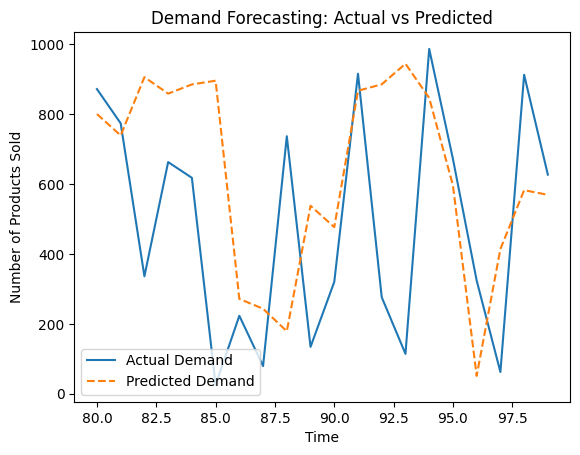

In [79]:
# Plot Predicted vs Actual Demand
plt.plot(y_test.index, y_test.values, label="Actual Demand")
plt.plot(y_test.index, y_pred, label="Predicted Demand", linestyle='dashed')
plt.legend()
plt.title("Demand Forecasting: Actual vs Predicted")
plt.xlabel("Time")
plt.ylabel("Number of Products Sold")
plt.show()

In [80]:
# ---- Inventory Optimization using Linear Programming ----

# Define Inventory Optimization Problem
# Assume we have stock levels, forecasted demand, and lead time in the data

# Set up the decision variables for how much inventory to order
if 'Stock levels' in data.columns:
    stock_levels = data['Stock levels'].iloc[-1]  # Use last available stock levels
else:
    stock_levels = 0  # Default to 0 if stock levels are not available

forecasted_demand = y_pred  # Forecasted demand from XGBoost model

# Create decision variables for order quantities for each product
order_vars = pulp.LpVariable.dicts("Order", range(len(forecasted_demand)), lowBound=0, cat='Continuous')

# Define the linear programming problem
prob = pulp.LpProblem("Inventory_Optimization", pulp.LpMinimize)

# Objective: Minimize the total order quantity needed to meet demand
prob += pulp.lpSum(order_vars[i] for i in range(len(forecasted_demand))), "Total Order Quantity"

# Constraints: Order quantity should meet or exceed the forecasted demand (taking into account lead time)
for i in range(len(forecasted_demand)):
    prob += order_vars[i] + stock_levels >= forecasted_demand[i], f"Demand_Constraint_{i}"

# Solve the optimization problem
prob.solve()

# Check solver status
if pulp.LpStatus[prob.status] == "Optimal":
    # Print optimal order quantities
    print("Optimal Order Quantities:")
    for v in prob.variables():
        print(v.name, "=", v.varValue)

    # Print total order quantity
    print("Total Order Quantity:", pulp.value(prob.objective))
else:
    print("Solver did not find an optimal solution.")

Optimal Order Quantities:
Order_0 = 745.5715
Order_1 = 684.24041
Order_10 = 421.7007
Order_11 = 812.26834
Order_12 = 830.60592
Order_13 = 889.59001
Order_14 = 791.56067
Order_15 = 541.28444
Order_16 = 0.0
Order_17 = 358.94064
Order_18 = 527.58813
Order_19 = 514.26926
Order_2 = 851.28598
Order_3 = 803.95577
Order_4 = 830.39778
Order_5 = 840.99755
Order_6 = 216.27006
Order_7 = 188.12993
Order_8 = 123.66311
Order_9 = 483.01026
Total Order Quantity: 11455.330460000001


Supply Chain & Shipping Cost Optimization (Prescriptive)

In [81]:
import pandas as pd
import pulp
import numpy as np

# Load Data (Make sure to adjust the path to your dataset)
data = pd.read_csv("/content/supply_chain_data.csv")

# **Check if 'Number of products sold' column exists for demand**
demand_column = 'Number of products sold'  # Based on your provided column name

# Define the Suppliers, Customers (locations), and transportation costs
suppliers = data['Supplier name'].unique()
locations = data['Location'].unique()

# For simplicity, let's assume shipping costs and stock levels are available in the dataset
# Create a cost matrix (random values for the sake of this example)
cost_matrix = pd.DataFrame(np.random.rand(len(suppliers), len(locations)) * 100,
                           index=suppliers, columns=locations)

# Assume we have stock levels and demands (these should come from your dataset)
stock_levels = data.groupby('Supplier name')['Stock levels'].sum().to_dict()  # Total stock by supplier
customer_demand = data.groupby('Location')[demand_column].sum().to_dict()  # Total demand by location

# Define Linear Programming Variables for shipping quantities from suppliers to customers
shipping_vars = pulp.LpVariable.dicts("Ship",
                                     [(supplier, location) for supplier in suppliers for location in locations],
                                     lowBound=0, cat='Continuous')

# Define the Linear Programming problem
prob = pulp.LpProblem("Shipping_Cost_Optimization", pulp.LpMinimize)

# Objective: Minimize the total shipping cost
prob += pulp.lpSum(shipping_vars[supplier, location] * cost_matrix.loc[supplier, location]
                   for supplier in suppliers for location in locations), "Total Shipping Cost"

# Constraints:

# 1. Meet customer demand (customer demand should be fulfilled)
for location in locations:
    prob += pulp.lpSum(shipping_vars[supplier, location] for supplier in suppliers) >= customer_demand[location], f"Demand_{location}"

# 2. Do not exceed supplier stock levels
for supplier in suppliers:
    prob += pulp.lpSum(shipping_vars[supplier, location] for location in locations) <= stock_levels[supplier], f"Stock_{supplier}"

# 3. If there is no shipping, the variable should be zero
# This constraint is automatically handled by the decision variable having a lower bound of 0.

# Solve the optimization problem
prob.solve()

# Check if the solution is optimal and display the results
if pulp.LpStatus[prob.status] == "Optimal":
    print("Optimal Shipping Plan Found:")

    # Print the optimal shipping quantities from suppliers to customers
    for supplier in suppliers:
        for location in locations:
            quantity_shipped = shipping_vars[supplier, location].varValue
            if quantity_shipped > 0:  # Display only the quantities that are actually shipped
                print(f"Ship {quantity_shipped} units from {supplier} to {location}")

    # Print total shipping cost
    print(f"Total Shipping Cost: {pulp.value(prob.objective)}")
else:
    print("No optimal solution found.")

No optimal solution found.


In [82]:
# Check if total demand is less than total stock
total_demand = sum(customer_demand.values())
total_stock = sum(stock_levels.values())
print(f"Total Demand: {total_demand}, Total Stock: {total_stock}")

# Check if there are any zero or negative shipping costs
print("Shipping Cost Matrix:")
print(cost_matrix)

# Check stock levels and customer demands by location
print("Stock Levels:", stock_levels)
print("Customer Demand:", customer_demand)

# Check solver status after running
print(f"Solver Status: {pulp.LpStatus[prob.status]}")

# Print more information if the solution is infeasible
if pulp.LpStatus[prob.status] == "Infeasible":
    print("Infeasible solution, check constraints and data integrity.")

Total Demand: 46099, Total Stock: 4777
Shipping Cost Matrix:
               Mumbai    Kolkata      Delhi  Bangalore    Chennai
Supplier 3  30.368549  53.433736  73.551654  46.861641  30.610140
Supplier 1  34.580199  91.185319  24.301307  41.996590  25.310248
Supplier 5  81.615013  47.968960  87.313766  24.061327  73.800874
Supplier 4   6.071363  35.024454  30.572775  91.100290  25.680988
Supplier 2  84.867901  83.919235  53.602025  69.693335   6.599920
Stock Levels: {'Supplier 1': 1142, 'Supplier 2': 1022, 'Supplier 3': 654, 'Supplier 4': 1061, 'Supplier 5': 898}
Customer Demand: {'Bangalore': 5420, 'Chennai': 8768, 'Delhi': 9715, 'Kolkata': 12770, 'Mumbai': 9426}
Solver Status: Infeasible
Infeasible solution, check constraints and data integrity.


In [84]:
import pandas as pd
import pulp
import numpy as np

# Load Data (Make sure to adjust the path to your dataset)
data = pd.read_csv("/content/supply_chain_data.csv")

# **Check if 'Demand' column exists. If not, use 'Number of products sold' instead.**
if 'Demand' not in data.columns:
    demand_column = 'Number of products sold'
else:
    demand_column = 'Demand'

# Define the Suppliers, Customers (locations), and transportation costs
suppliers = data['Supplier name'].unique()
locations = data['Location'].unique()

# For simplicity, let's assume shipping costs and stock levels are available in the dataset
# Create a cost matrix (random values for the sake of this example)
cost_matrix = pd.DataFrame(np.random.rand(len(suppliers), len(locations)) * 100,
                           index=suppliers, columns=locations)

# Assume we have stock levels and demands (these should come from your dataset)
stock_levels = data.groupby('Supplier name')['Stock levels'].sum().to_dict()  # Total stock by supplier
customer_demand = data.groupby('Location')[demand_column].sum().to_dict()  # Total demand by location

# Check total stock and demand for sanity check
total_stock = sum(stock_levels.values())
total_demand = sum(customer_demand.values())
print(f"Total Demand: {total_demand}, Total Stock: {total_stock}")

# Define Linear Programming Variables for shipping quantities from suppliers to customers
shipping_vars = pulp.LpVariable.dicts("Ship",
                                     [(supplier, location) for supplier in suppliers for location in locations],
                                     lowBound=0, cat='Continuous')

# Define the Linear Programming problem
prob = pulp.LpProblem("Shipping_Cost_Optimization", pulp.LpMinimize)

# Objective: Minimize the total shipping cost
prob += pulp.lpSum(shipping_vars[supplier, location] * cost_matrix.loc[supplier, location]
                   for supplier in suppliers for location in locations), "Total Shipping Cost"

# Constraints:

# 1. Meet customer demand (allow partial fulfillment, for example 80% of demand)
for location in locations:
    prob += pulp.lpSum(shipping_vars[supplier, location] for supplier in suppliers) >= customer_demand[location] * 0.8, f"Demand_{location}"

# 2. Do not exceed supplier stock levels
for supplier in suppliers:
    prob += pulp.lpSum(shipping_vars[supplier, location] for location in locations) <= stock_levels[supplier], f"Stock_{supplier}"

# 3. If there is no shipping, the variable should be zero
# This constraint is automatically handled by the decision variable having a lower bound of 0.

# Solve the optimization problem
prob.solve()

# Check if the solution is optimal and display the results
if pulp.LpStatus[prob.status] == "Optimal":
    print("Optimal Shipping Plan Found:")

    # Print the optimal shipping quantities from suppliers to customers
    for supplier in suppliers:
        for location in locations:
            quantity_shipped = shipping_vars[supplier, location].varValue
            if quantity_shipped > 0:  # Display only the quantities that are actually shipped
                print(f"Ship {quantity_shipped} units from {supplier} to {location}")

    # Print total shipping cost
    print(f"Total Shipping Cost: {pulp.value(prob.objective)}")
else:
    print("No optimal solution found.")

Total Demand: 46099, Total Stock: 4777
No optimal solution found.


Production Scheduling & Route Optimization (Prescriptive)

In [85]:
import pandas as pd
import pulp
import numpy as np

# Sample data - Modify with your actual data
products = ['Product_A', 'Product_B', 'Product_C']
factories = ['Factory_1', 'Factory_2']
locations = ['Location_1', 'Location_2', 'Location_3']

# Sample production rates and times (modify as needed)
production_rates = {'Product_A': 20, 'Product_B': 15, 'Product_C': 25}
production_times = {'Product_A': 5, 'Product_B': 3, 'Product_C': 4}

# Sample available machine hours per factory (modify as needed)
available_machine_hours = {'Factory_1': 120, 'Factory_2': 100}

# Sample demand data (modify as needed)
demand = {'Product_A': {'Location_1': 30, 'Location_2': 40, 'Location_3': 50},
          'Product_B': {'Location_1': 20, 'Location_2': 30, 'Location_3': 40},
          'Product_C': {'Location_1': 10, 'Location_2': 20, 'Location_3': 30}}

# Delivery cost data (random for the sake of the example)
delivery_costs = pd.DataFrame(np.random.rand(len(factories), len(locations)) * 100,
                              index=factories, columns=locations)

# Initialize Linear Program
prob = pulp.LpProblem("Production_and_Route_Optimization", pulp.LpMinimize)

# Production variables
production_vars = pulp.LpVariable.dicts("Produce",
                                       [(product, factory) for product in products for factory in factories],
                                       lowBound=0, cat='Continuous')

# Delivery variables
delivery_vars = pulp.LpVariable.dicts("Deliver",
                                     [(product, factory, location) for product in products for factory in factories for location in locations],
                                     lowBound=0, cat='Continuous')

# Objective: Minimize total production and delivery cost
prob += pulp.lpSum(production_vars[product, factory] * production_times[product] * available_machine_hours[factory]
                   for product in products for factory in factories) + \
         pulp.lpSum(delivery_vars[product, factory, location] * delivery_costs.loc[factory, location]
                    for product in products for factory in factories for location in locations), "Total Cost"

# Constraints:

# Meet demand for each product at each location
for product in products:
    for location in locations:
        prob += pulp.lpSum(delivery_vars[product, factory, location] for factory in factories) == demand[product][location], f"Demand_{product}_{location}"

# Meet production capacity at each factory (based on available machine hours)
for factory in factories:
    for product in products:
        prob += production_vars[product, factory] * production_times[product] <= available_machine_hours[factory], f"ProductionCapacity_{product}_{factory}"

# Ensure production meets the required number of products for delivery
for product in products:
    for factory in factories:
        prob += production_vars[product, factory] == pulp.lpSum(delivery_vars[product, factory, location] for location in locations), f"ProductionEqualsDelivery_{product}_{factory}"

# Debugging: Print some details to verify if constraints are feasible
print(f"Total demand for all products: {sum([sum(demand[product].values()) for product in demand])}")
print(f"Total production capacity available: {sum(available_machine_hours.values())}")

# Solve the optimization problem
prob.solve()

# Check the solution status and print the results
if pulp.LpStatus[prob.status] == "Optimal":
    print("Optimal Production and Delivery Plan Found:")

    # Print the optimal production schedule
    for product in products:
        for factory in factories:
            quantity_produced = production_vars[product, factory].varValue
            if quantity_produced > 0:
                print(f"Produce {quantity_produced} units of {product} at {factory}")

    # Print the optimal delivery plan
    for product in products:
        for factory in factories:
            for location in locations:
                quantity_delivered = delivery_vars[product, factory, location].varValue
                if quantity_delivered > 0:
                    print(f"Deliver {quantity_delivered} units of {product} from {factory} to {location}")

    # Print the total cost
    print(f"Total Production and Delivery Cost: {pulp.value(prob.objective)}")
else:
    print("No optimal solution found.")

Total demand for all products: 270
Total production capacity available: 220
No optimal solution found.


In [86]:
import pandas as pd
import pulp
import numpy as np

# Sample data - Modify with your actual data
products = ['Product_A', 'Product_B', 'Product_C']
factories = ['Factory_1', 'Factory_2']
locations = ['Location_1', 'Location_2', 'Location_3']

# Sample production rates and times (modify as needed)
production_rates = {'Product_A': 20, 'Product_B': 15, 'Product_C': 25}
production_times = {'Product_A': 5, 'Product_B': 3, 'Product_C': 4}

# Sample available machine hours per factory (modify as needed)
available_machine_hours = {'Factory_1': 120, 'Factory_2': 100}

# Sample demand data (modify as needed)
demand = {'Product_A': {'Location_1': 30, 'Location_2': 40, 'Location_3': 50},
          'Product_B': {'Location_1': 20, 'Location_2': 30, 'Location_3': 40},
          'Product_C': {'Location_1': 10, 'Location_2': 20, 'Location_3': 30}}

# Delivery cost data (random for the sake of the example)
delivery_costs = pd.DataFrame(np.random.rand(len(factories), len(locations)) * 100,
                              index=factories, columns=locations)

# Penalty for unmet demand (set a cost for not fulfilling the demand)
penalty_cost = 100  # Penalty per unit of unmet demand

# Initialize Linear Program
prob = pulp.LpProblem("Production_and_Route_Optimization", pulp.LpMinimize)

# Production variables
production_vars = pulp.LpVariable.dicts("Produce",
                                       [(product, factory) for product in products for factory in factories],
                                       lowBound=0, cat='Continuous')

# Delivery variables
delivery_vars = pulp.LpVariable.dicts("Deliver",
                                     [(product, factory, location) for product in products for factory in factories for location in locations],
                                     lowBound=0, cat='Continuous')

# Unmet demand variables (we will add this to account for the penalty)
unmet_demand_vars = pulp.LpVariable.dicts("UnmetDemand",
                                          [(product, location) for product in products for location in locations],
                                          lowBound=0, cat='Continuous')

# Objective: Minimize total production and delivery cost plus penalty for unmet demand
prob += pulp.lpSum(production_vars[product, factory] * production_times[product] * available_machine_hours[factory]
                   for product in products for factory in factories) + \
         pulp.lpSum(delivery_vars[product, factory, location] * delivery_costs.loc[factory, location]
                    for product in products for factory in factories for location in locations) + \
         pulp.lpSum(unmet_demand_vars[product, location] * penalty_cost
                    for product in products for location in locations), "Total Cost"

# Constraints:

# Meet demand for each product at each location or incur a penalty
for product in products:
    for location in locations:
        prob += pulp.lpSum(delivery_vars[product, factory, location] for factory in factories) + unmet_demand_vars[product, location] == demand[product][location], f"Demand_{product}_{location}"

# Meet production capacity at each factory (based on available machine hours)
for factory in factories:
    for product in products:
        prob += production_vars[product, factory] * production_times[product] <= available_machine_hours[factory], f"ProductionCapacity_{product}_{factory}"

# Ensure production meets the required number of products for delivery
for product in products:
    for factory in factories:
        prob += production_vars[product, factory] == pulp.lpSum(delivery_vars[product, factory, location] for location in locations), f"ProductionEqualsDelivery_{product}_{factory}"

# Debugging: Print some details to verify if constraints are feasible
print(f"Total demand for all products: {sum([sum(demand[product].values()) for product in demand])}")
print(f"Total production capacity available: {sum(available_machine_hours.values())}")

# Solve the optimization problem
prob.solve()

# Check the solution status and print the results
if pulp.LpStatus[prob.status] == "Optimal":
    print("Optimal Production and Delivery Plan Found:")

    # Print the optimal production schedule
    for product in products:
        for factory in factories:
            quantity_produced = production_vars[product, factory].varValue
            if quantity_produced > 0:
                print(f"Produce {quantity_produced} units of {product} at {factory}")

    # Print the optimal delivery plan
    for product in products:
        for factory in factories:
            for location in locations:
                quantity_delivered = delivery_vars[product, factory, location].varValue
                if quantity_delivered > 0:
                    print(f"Deliver {quantity_delivered} units of {product} from {factory} to {location}")

    # Print the unmet demand and associated penalty
    for product in products:
        for location in locations:
            unmet_quantity = unmet_demand_vars[product, location].varValue
            if unmet_quantity > 0:
                print(f"Unmet demand for {product} at {location}: {unmet_quantity} units")

    # Print the total cost
    print(f"Total Production and Delivery Cost: {pulp.value(prob.objective)}")
else:
    print("No optimal solution found.")

Total demand for all products: 270
Total production capacity available: 220
Optimal Production and Delivery Plan Found:
Unmet demand for Product_A at Location_1: 30.0 units
Unmet demand for Product_A at Location_2: 40.0 units
Unmet demand for Product_A at Location_3: 50.0 units
Unmet demand for Product_B at Location_1: 20.0 units
Unmet demand for Product_B at Location_2: 30.0 units
Unmet demand for Product_B at Location_3: 40.0 units
Unmet demand for Product_C at Location_1: 10.0 units
Unmet demand for Product_C at Location_2: 20.0 units
Unmet demand for Product_C at Location_3: 30.0 units
Total Production and Delivery Cost: 27000.0


Defect Prediction & Supplier Performance Evaluation (Predictive)

In [88]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv("/content/supply_chain_data.csv")

# Check for missing values in key columns
print(data.isnull().sum())  # Check for missing values

# Fill missing values if needed (example: fill with the mean for numeric columns)
data['Defect rates'] = data['Defect rates'].fillna(data['Defect rates'].mean())  # Avoid using inplace=True

# Feature Engineering: Prepare features for the defect prediction model
features = ['Price', 'Stock levels', 'Lead times', 'Order quantities', 'Shipping times', 'Shipping costs',
            'Production volumes', 'Manufacturing lead time', 'Manufacturing costs', 'Transportation modes']

# Check if 'Transportation modes' exists and handle it if necessary
if 'Transportation modes' not in data.columns:
    features.remove('Transportation modes')

# Define the features and target
X = data[features]
y = data['Defect rates']

# Convert categorical features into numeric (if any)
X = pd.get_dummies(X, drop_first=True)  # Convert categorical features into dummy variables if needed

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R²: {r2}")

# Add predicted defect rates to the dataset
data['Predicted Defect Rates'] = model.predict(scaler.transform(X))

# Evaluate Supplier Performance based on Predicted Defect Rates
supplier_performance = data.groupby('Supplier name').agg(
    predicted_defect_rate=('Predicted Defect Rates', 'mean'),
    actual_defect_rate=('Defect rates', 'mean')
).reset_index()

# Display Supplier Performance Evaluation
print(supplier_performance)

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64
Mean Squared Error: 2.2301259286107404
R²: -1.0275263466449687
  Supplier name  predicted_defect_rate  actual_defect_rate
0    Supplier 1               2.020077            1.803630
1    Supplier 2               2.412735            2.362750
2    Supplier 3               2.365433            2

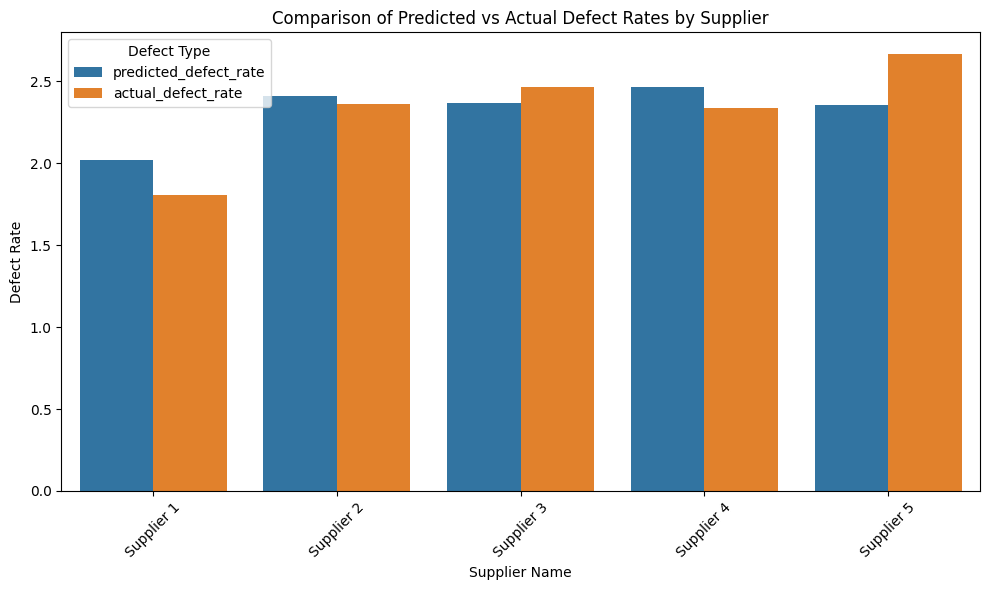

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'supplier_performance' DataFrame is already created
# Create a bar plot for predicted vs actual defect rates by supplier
plt.figure(figsize=(10, 6))

# Melt the data to make it suitable for seaborn
supplier_performance_melted = supplier_performance.melt(id_vars="Supplier name",
                                                         value_vars=["predicted_defect_rate", "actual_defect_rate"],
                                                         var_name="Defect Type", value_name="Defect Rate")

# Create the bar plot
sns.barplot(x="Supplier name", y="Defect Rate", hue="Defect Type", data=supplier_performance_melted)

# Customize the plot
plt.title('Comparison of Predicted vs Actual Defect Rates by Supplier')
plt.xlabel('Supplier Name')
plt.ylabel('Defect Rate')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()